In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pathlib import Path
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.preprocessing import StandardScaler

In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
sentence = """At eight o'clock on Thursday morning
... Arthur didn't feel very good."""

In [4]:
tokens = nltk.word_tokenize(sentence)
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

In [5]:
tagged = nltk.pos_tag(tokens)
tagged[0:6]

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN')]

# Localからテキストを読み込む

In [6]:
path = Path(r'C:\Users\tsuka\Desktop\txt')
path = Path(r'C:\Users\SI\Python_ML\NLTK_\txt')
path
path.glob('*')
list(path.glob('*'))
print('lists:', path.glob('*'))
#list path
path = list(path.glob('*'))
data = pd.read_table(path[0])
data, path

lists: <generator object Path.glob at 0x0000017F32533D00>


(                                    Inaugural Address
 0                   By President Barack Hussein Obama
 1                                    January 20, 2009
 2                                 My fellow citizens:
 3   I stand here today humbled by the task before ...
 4   I thank President Bush for his service to our ...
 5   Forty-four Americans have now taken the presid...
 6   So it has been; so it must be with this genera...
 7   That we are in the midst of crisis is now well...
 8   These are the indicators of crisis, subject to...
 9   Today I say to you that the challenges we face...
 10  On this day, we gather because we have chosen ...
 11  In reaffirming the greatness of our nation we ...
 12  For us, they packed up their few worldly posse...
 13  Time and again these men and women struggled a...
 14  This is the journey we continue today. We rema...
 15  For everywhere we look, there is work to be do...
 16  Now, there are some who question the scale of ...
 17  The q

# テキストの内容をリスト化１

In [7]:
path

[WindowsPath('C:/Users/SI/Python_ML/NLTK_/txt/obama_speech.txt'),
 WindowsPath('C:/Users/SI/Python_ML/NLTK_/txt/The Fall of the House of Usher by Edgar Allan Poe.txt')]

# テキストの内容をリスト化2

In [8]:
import nltk
nltk.download('gutenberg')
#from nltk.book import *

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\SI\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [9]:
book_list = nltk.corpus.gutenberg.fileids()
book_list

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

# Book_listをローカルから読み込む

In [10]:
path = Path(r'C:\Users\tsuka\Desktop\txt')
path = Path(r'C:\Users\SI\Python_ML\NLTK_\txt')
path
path.glob('*')
list(path.glob('*'))
print('lists:', path.glob('*'))
#list path
path = list(path.glob('*'))
data = pd.read_table(path[0])
data, path

lists: <generator object Path.glob at 0x0000017F32533AF0>


(                                    Inaugural Address
 0                   By President Barack Hussein Obama
 1                                    January 20, 2009
 2                                 My fellow citizens:
 3   I stand here today humbled by the task before ...
 4   I thank President Bush for his service to our ...
 5   Forty-four Americans have now taken the presid...
 6   So it has been; so it must be with this genera...
 7   That we are in the midst of crisis is now well...
 8   These are the indicators of crisis, subject to...
 9   Today I say to you that the challenges we face...
 10  On this day, we gather because we have chosen ...
 11  In reaffirming the greatness of our nation we ...
 12  For us, they packed up their few worldly posse...
 13  Time and again these men and women struggled a...
 14  This is the journey we continue today. We rema...
 15  For everywhere we look, there is work to be do...
 16  Now, there are some who question the scale of ...
 17  The q

In [11]:
read_book_list = []
for i in range(len(path)):
    data = pd.read_table(path[i])
    print(i, data, path[i])
    file_content = open(path[i]).read()
    read_book = nltk.word_tokenize(file_content)
    print(len(read_book))
    
    #read_book = nltk.corpus.gutenberg.words(book_list[i])
    read_book_list.append(read_book)
    print('No.',i,'\n', read_book_list, '\n')

0                                     Inaugural Address
0                   By President Barack Hussein Obama
1                                    January 20, 2009
2                                 My fellow citizens:
3   I stand here today humbled by the task before ...
4   I thank President Bush for his service to our ...
5   Forty-four Americans have now taken the presid...
6   So it has been; so it must be with this genera...
7   That we are in the midst of crisis is now well...
8   These are the indicators of crisis, subject to...
9   Today I say to you that the challenges we face...
10  On this day, we gather because we have chosen ...
11  In reaffirming the greatness of our nation we ...
12  For us, they packed up their few worldly posse...
13  Time and again these men and women struggled a...
14  This is the journey we continue today. We rema...
15  For everywhere we look, there is work to be do...
16  Now, there are some who question the scale of ...
17  The question we ask to

# sample texts analysis

In [12]:
for i in range(len(book_list)):
    print(i, book_list[i])

0 austen-emma.txt
1 austen-persuasion.txt
2 austen-sense.txt
3 bible-kjv.txt
4 blake-poems.txt
5 bryant-stories.txt
6 burgess-busterbrown.txt
7 carroll-alice.txt
8 chesterton-ball.txt
9 chesterton-brown.txt
10 chesterton-thursday.txt
11 edgeworth-parents.txt
12 melville-moby_dick.txt
13 milton-paradise.txt
14 shakespeare-caesar.txt
15 shakespeare-hamlet.txt
16 shakespeare-macbeth.txt
17 whitman-leaves.txt


In [13]:
read_book_list = []
for i in range(len(book_list)):
    read_book = nltk.corpus.gutenberg.words(book_list[i])
    read_book_list.append(read_book)
    print('No.',i,'\n', read_book_list, '\n')

No. 0 
 [['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]] 

No. 1 
 [['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...], ['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ...]] 

No. 2 
 [['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...], ['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ...], ['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', ...]] 

No. 3 
 [['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...], ['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ...], ['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', ...], ['[', 'The', 'King', 'James', 'Bible', ']', 'The', ...]] 

No. 4 
 [['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...], ['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ...], ['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', ...], ['[', 'The', 'King', 'James', 'Bible', ']', 'The', ...], ['[', 'Poems', 'by', 'William', 'Blake', '1789', ']', ...]] 

No. 5 
 [['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...], ['[', 'Persuasion

In [14]:
nltk.corpus.gutenberg.words('austen-emma.txt')

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [15]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [16]:
#text1.concordance()の操作を行う
for i in range(len(book_list)):
    print("No",i, "sample is been testing:")
    nltk.Text(nltk.corpus.gutenberg.words(book_list[i])).concordance("in")

No 0 sample is been testing:
Displaying 25 of 2188 matches:
d had lived nearly twenty - one years in the world with very little to distres
ionate , indulgent father ; and had , in consequence of her sister ' s marriag
o had fallen little short of a mother in affection . Sixteen years had Miss Ta
 . Sixteen years had Miss Taylor been in Mr . Woodhouse ' s family , less as a
 -- a gentle sorrow -- but not at all in the shape of any disagreeable conscio
is beloved friend that Emma first sat in mournful thought of any continuance .
ers ; and there was some satisfaction in considering with what self - denying 
ll her powers to attach and amuse her in health -- and how nursed her through 
l the ways of the family , interested in all its concerns , and peculiarly int
 concerns , and peculiarly interested in herself , in every pleasure , every s
nd peculiarly interested in herself , in every pleasure , every scheme of hers
 a mile from them , and a Miss Taylor in the house ; and with all her a

Displaying 25 of 641 matches:
Cone Bryant 1918 ] TWO LITTLE RIDDLES IN RHYME There ' s a garden that I ken ,
it rains or snows , He sleeps outside in the night . ( The path .) THE LITTLE 
tle yellow Tulip , and she lived down in a little dark house under the ground 
 It ' s the Rain , and I want to come in ," said a soft , sad , little voice .
ittle voice . " No , you can ' t come in ," the little Tulip said . By and by 
 It ' s the Rain , and I want to come in !" " No , you can ' t come in ," said
to come in !" " No , you can ' t come in ," said the little Tulip . Then it wa
, cheery voice , " and I want to come in !" " N -- no ," said the little Tulip
the little Tulip , " you can ' t come in ." And she sat still again . Pretty s
y little voice , " and I want to come in , I want to come in !" " No , no ," s
nd I want to come in , I want to come in !" " No , no ," said the little Tulip
 the little Tulip , " you cannot come in ." By and by , as she sat so still , 
es , together , " and 

And the Green Carnation withered , as in forest fires that pass , Roared in th
as in forest fires that pass , Roared in the wind of all the world ten million
 and sweet and sudden as a bird sings in the rain -- Truth out of Tusitala spo
 and clear and sudden as a bird sings in the grey , Dunedin to Samoa spoke , a
nd the good Republic come riding back in arms : We have seen the City of Manso
now be told ; Yea , there is strength in striking root and good in growing old
is strength in striking root and good in growing old . We have found common th
 an artistic colony , though it never in any definable way produced any art . 
aped the people must be who could fit in to them . Nor when he met the people 
he met the people was he disappointed in this respect . The place was not only
 least he was the cause of philosophy in others . That scientific gentleman wi
 . He had not discovered anything new in biology ; but what biological creatur
, and the big Chinese lanterns glowed in the dwarfis

ar thought to work , I know not : But in the grosse and scope of my Opinion , 
late Pride ) Dar ' d to the Combate . In which , our Valiant Hamlet , ( For so
improued Mettle , hot and full , Hath in the skirts of Norway , heere and ther
 some Enterprize That hath a stomacke in ' t : which is no other ( And it doth
head Of this post - hast , and Romage in the Land . Enter Ghost againe . But s
eake . Or , if thou hast vp - hoorded in thy life Extorted Treasure in the wom
hoorded in thy life Extorted Treasure in the wombe of Earth , ( For which , th
ch , they say , you Spirits oft walke in death ) Speake of it . Stay , and spe
of Day : and at his warning , Whether in Sea , or Fire , in Earth , or Ayre , 
 warning , Whether in Sea , or Fire , in Earth , or Ayre , Th ' extrauagant , 
e time Hor . So haue I heard , and do in part beleeue it . But looke , the Mor
rt beleeue it . But looke , the Morne in Russet mantle clad , Walkes o ' re th
ll acquaint him with it , As needfull in our Loues ,

In [17]:
book_list[0], read_book_list[0]

('austen-emma.txt', ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...])

In [18]:
prep_list = ['and', 'the', 'that', 'of', 'was', 'upon', 'not', 'when', 'then']
prep_list 

['and', 'the', 'that', 'of', 'was', 'upon', 'not', 'when', 'then']

In [19]:
prep_array = np.array(prep_list)
prep_array

array(['and', 'the', 'that', 'of', 'was', 'upon', 'not', 'when', 'then'],
      dtype='<U4')

# text1.concordance()の操作を行う

In [20]:
#text1.concordance()の操作を行う
for i in range(len(book_list)):
    for j in range(len(prep_array)):
        print("No",i, "book sample", "and No.", j, "preposition is been testing:")
        nltk.Text(nltk.corpus.gutenberg.words(book_list[i])).concordance(prep_list[j])
print("testing preposition completed")

No 0 book sample and No. 0 preposition is been testing:
Displaying 25 of 4896 matches:
 Emma Woodhouse , handsome , clever , and rich , with a comfortable home and ha
 , and rich , with a comfortable home and happy disposition , seemed to unite s
 of the best blessings of existence ; and had lived nearly twenty - one years i
ost affectionate , indulgent father ; and had , in consequence of her sister ' 
istinct remembrance of her caresses ; and her place had been supplied by an exc
allowed her to impose any restraint ; and the shadow of authority being now lon
ey had been living together as friend and friend very mutually attached , and E
d and friend very mutually attached , and Emma doing just what she liked ; high
 having rather too much her own way , and a disposition to think a little too w
 any continuance . The wedding over , and the bride - people gone , her father 
 the bride - people gone , her father and herself were left to dine together , 
lf to sleep after dinner , as usu

Displaying 25 of 2398 matches:
y little to distress or vex her . She was the youngest of the two daughters of 
ticularly of Emma . Between _them_ it was more the intimacy of sisters . Even b
y enjoyments . The danger , however , was at present so unperceived , that they
iousness .-- Miss Taylor married . It was Miss Taylor ' s loss which first brou
s loss which first brought grief . It was on the wedding - day of this beloved 
appiness for her friend . Mr . Weston was a man of unexceptionable character , 
ge , and pleasant manners ; and there was some satisfaction in considering with
ished and promoted the match ; but it was a black morning ' s work for her . Th
childhood . A large debt of gratitude was owing here ; but the intercourse of t
, on their being left to each other , was yet a dearer , tenderer recollection 
r her as could never find fault . How was she to bear the change ?-- It was tru
How was she to bear the change ?-- It was true that her friend was going only h
hange ?--

Displaying 25 of 169 matches:
fter dinner , as usual , and she had then only to sit and think of what she ha
g it again to yourself every now and then afterwards , why do you talk of succ
ing into the militia of his county , then embodied . Captain Weston was a gene
le difficulties and privations . And then there was such comfort in the very e
lighted with its own ideas , did she then do all the honours of the meal , and
im ? He is in Highbury every now and then , and he is sure to ride through eve
st not be kept waiting ; and Harriet then came running to her with a smiling f
 he said of you the other day ?" She then repeated some warm personal praise w
ildren that she would not be quiet . Then , here come all my attempts at three
he corner of the sofa is very good . Then here is my last ,"-- unclosing a pre
k Square ;-- and , as I said , I did then forswear ever drawing any body again
 him to place himself elsewhere . It then occurred to her to employ him in rea
." " You think I ought

Displaying 25 of 2570 matches:
 1818 ] Chapter 1 Sir Walter Elliot , of Kellynch Hall , in Somersetshire , wa
 by contemplating the limited remnant of the earliest patents ; there any unwe
ned over the almost endless creations of the last century ; and there , if eve
urite volume always opened : " ELLIOT OF KELLYNCH HALL . " Walter Elliot , bor
July 15 , 1784 , Elizabeth , daughter of James Stevenson , Esq . of South Park
, daughter of James Stevenson , Esq . of South Park , in the county of Glouces
, Esq . of South Park , in the county of Gloucester , by which lady ( who died
ed it by adding , for the information of himself and his family , these words 
family , these words , after the date of Mary ' s birth -- " Married , Decembe
er 16 , 1810 , Charles , son and heir of Charles Musgrove , Esq . of Uppercros
 and heir of Charles Musgrove , Esq . of Uppercross , in the county of Somerse
, Esq . of Uppercross , in the county of Somerset ," and by inserting most acc
 by inserting most ac

Displaying 25 of 228 matches:
 it no matter of indifference to her when she was called on to quit them . -- 
 apt to be unreasonably discontented when a woman does marry again , than when
when a woman does marry again , than when she does not ; but Sir Walter ' s co
 book an evil ; and more than once , when her father had left it open on the t
 their spring excursions to London , when Elizabeth was in her first bloom , M
stressed for money . She knew , that when he now took up the Baronetage , it w
se something of their personableness when they cease to be quite young ." It s
They were gradually acquainted , and when acquainted , rapidly and deeply in l
ound them . She had been solicited , when about two - and - twenty , to change
p out of the way till all was over ; when she found it most natural to be sorr
always in the habit of claiming Anne when anything was the matter , was indisp
one part of the Kellynch Hall plan , when it burst on her , which was , Mrs Cl
ed a village , and be 

Displaying 25 of 1385 matches:
hem from their father ' s inheriting that property , could be but small . Thei
ncluding the late legacies , was all that remained for his widow and daughters
so keen , a generosity so romantic , that any offence of the kind , by whomsoe
ise her daughter - in - law for it , that , on the arrival of the latter , she
act , to the advantage of them all , that eagerness of mind in Mrs . Dashwood 
 of wretchedness in every reflection that could afford it , and resolved again
, or possess , in a greater degree , that sanguine expectation of happiness wh
e an amount . It was very well known that no affection was ever supposed to ex
est to me ," replied her husband , " that I should assist his widow and daught
LET something be done for them ; but THAT something need not be three thousand
d pounds . Consider ," she added , " that when the money is once parted with ,
 said her husband , very gravely , " that would make great difference . The ti
time may come when Ha

Displaying 25 of 1248 matches:
hwood to his wishes , which proceeded not merely from interest , but from goodn
 succession to the Norland estate was not so really important as to his sisters
is niece and her daughters . He meant not to be unkind , however , and , as a m
 and sisters . Mr . John Dashwood had not the strong feelings of the rest of th
 in his power to do for them . He was not an ill - disposed young man , unless 
r many days successively , and he did not repent . No sooner was his father ' s
have quitted the house for ever , had not the entreaty of her eldest girl induc
ut having much of her sense , she did not , at thirteen , bid fair to equal her
eyond alloy . Mrs . John Dashwood did not at all approve of what her husband in
t his widow and daughters ." " He did not know what he was talking of , I dare 
e been in his right senses , he could not have thought of such a thing as beggi
rtune from your own child ." " He did not stipulate for any particular sum , my
 as he re

Displaying 25 of 64023 matches:
[ The King James Bible ] The Old Testament 
[ The King James Bible ] The Old Testament of the King James Bible
ng James Bible ] The Old Testament of the King James Bible The First Book of Mo
Old Testament of the King James Bible The First Book of Moses : Called Genesis 
ok of Moses : Called Genesis 1 : 1 In the beginning God created the heaven and 
is 1 : 1 In the beginning God created the heaven and the earth . 1 : 2 And the 
 beginning God created the heaven and the earth . 1 : 2 And the earth was witho
 the heaven and the earth . 1 : 2 And the earth was without form , and void ; a
rm , and void ; and darkness was upon the face of the deep . And the Spirit of 
d ; and darkness was upon the face of the deep . And the Spirit of God moved up
s was upon the face of the deep . And the Spirit of God moved upon the face of 
ep . And the Spirit of God moved upon the face of the waters . 1 : 3 And God sa
 Spirit of God moved upon the face of the waters . 1 : 3 

Displaying 25 of 2748 matches:
t form , and void ; and darkness was upon the face of the deep . And the Spiri
e deep . And the Spirit of God moved upon the face of the waters . 1 : 3 And G
his kind , whose seed is in itself , upon the earth : and it was so . 1 : 12 A
irmament of the heaven to give light upon the earth : and it was so . 1 : 16 A
irmament of the heaven to give light upon the earth , 1 : 18 And to rule over 
kind , and every thing that creepeth upon the earth after his kind : and God s
r every creeping thing that creepeth upon the earth . 1 : 27 So God created ma
 over every living thing that moveth upon the earth . 1 : 29 And God said , Be
u every herb bearing seed , which is upon the face of all the earth , and ever
r , and to every thing that creepeth upon the earth , wherein there is life , 
e LORD God had not caused it to rain upon the earth , and there was not a man 
LORD God caused a deep sleep to fall upon Adam , and he slept : and he took on
and above every beast

Displaying 25 of 30 matches:
IMNEY - SWEEPER When my mother died I was very young , And my father sold me wh
 , That curled like a lamb ' s back , was shaved ; so I said , " Hush , Tom ! n
ot spoil your white hair ." And so he was quiet , and that very night , As Tom 
 quiet , and that very night , As Tom was a - sleeping , he had such a sight ! 
 brushes to work . Though the morning was cold , Tom was happy and warm : So , 
k . Though the morning was cold , Tom was happy and warm : So , if all do their
 Or else I shall be lost ." The night was dark , no father was there , The chil
ost ." The night was dark , no father was there , The child was wet with dew ; 
ark , no father was there , The child was wet with dew ; The mire was deep , an
The child was wet with dew ; The mire was deep , and the child did weep , And a
for me , for thee , for all , When He was an infant small . Thou His image ever
all their own . The hum of multitudes was there , but multitudes of lambs , Tho
ay A couchi

Displaying 25 of 2098 matches:
men ; Little caps of blue they wear , And green ribbons , very fair . ( Flax .)
 to house he goes , A messenger small and slight , And whether it rains or snow
goes , A messenger small and slight , And whether it rains or snows , He sleeps
nce there was a little yellow Tulip , and she lived down in a little dark house
 was sitting there , all by herself , and it was very still . Suddenly , she he
hat ?" she said . " It ' s the Rain , and I want to come in ," said a soft , sa
come in ," the little Tulip said . By and by she heard another little _tap , ta
 voice answered , " It ' s the Rain , and I want to come in !" " No , you can '
id a little , soft , cheery voice , " and I want to come in !" " N -- no ," sai
ttle Tulip , " you can ' t come in ." And she sat still again . Pretty soon she
e ," said the cheery little voice , " and I want to come in , I want to come in
le Tulip , " you cannot come in ." By and by , as she sat so still , she heard 
still , s

Displaying 25 of 713 matches:
.) THE LITTLE YELLOW TULIP Once there was a little yellow Tulip , and she lived
 house under the ground . One day she was sitting there , all by herself , and 
tting there , all by herself , and it was very still . Suddenly , she heard a l
in ," said the little Tulip . Then it was very still for a long time . At last 
 she poked her head through ; and she was in the midst of a beautiful garden . 
 the midst of a beautiful garden . It was early springtime , and few other flow
ine upon her pretty yellow head . She was so pleased , too , when the children 
ke it ; I do . Once upon a time there was a little boy , and he wanted to be a 
 a cock - a - doo - dle - doo . So he was a cock - a - doo - dle - doo . And he
 do something for the people of earth was ever greater in her heart . On earth 
hing which had been told her when she was a tiny Cloud - child , in the lap of 
s far over the fields and woods . She was so great , so majestic , that men and
 , healing

Displaying 25 of 185 matches:
t come in ," said the little Tulip . Then it was very still for a long time . 
 right up to the top of the ground . Then they said ,-- " Poke your head throu
 Not I ," said the Duck . " I will , then ," said the little Red Hen , and she
 Not I ," said the Duck . " I will , then ," said the little Red Hen , and she
 Not I ," said the Duck . " I will , then ," said the little Red Hen . When th
 into shape , she put him in a pan ; then she put the pan in the oven and shut
the threshers couldn ' t catch him . Then the little Gingerbread Boy ran faste
 not think of disturbing you ." Just then , the little Gingerbread Boy came to
 , this way and that , to get away . Then , of course , the Lion could see whe
ll you , and it will be all right ." Then what did those cunning little Jackal
," he said ; " I ' ll eat him up and then I ' ll eat you up ." The little Jack
 nothing ; she will soon go away and then we can go back ." After the cook had
ut , till she fell asl

Displaying 25 of 342 matches:
[ The Adventures of Buster Bear by Thornton W . Burgess 1
wned as he lay on his comfortable bed of leaves and watched the first early mo
egs , reached as high up on the trunk of the tree as he could , and scratched 
was listening to the sounds that told of the waking of all the little people w
to the sounds that told of the waking of all the little people who live in the
t , or if he has stolen the breakfast of some one else . Probably he is the th
ge . " Must be that Chatterer got out of bed the wrong way this morning ," tho
ard Blacky the Crow cawing at the top of his lungs , and he knew by the sound 
that Blacky was getting into mischief of some kind . He heard the sweet voices
some kind . He heard the sweet voices of happy little singers , and they were 
and they were good to hear . But most of all he listened to a merry , low , si
 he must laugh too . It was the voice of the Laughing Brook . And as Buster li
Brook , and straight to a little pool of wh

Displaying 25 of 1642 matches:
Lewis Carroll 1865 ] CHAPTER I . Down the Rabbit - Hole Alice was beginning to 
ery tired of sitting by her sister on the bank , and of having nothing to do : 
o : once or twice she had peeped into the book her sister was reading , but it 
r conversations in it , ' and what is the use of a book ,' thought Alice ' with
own mind ( as well as she could , for the hot day made her feel very sleepy and
eel very sleepy and stupid ), whether the pleasure of making a daisy - chain wo
making a daisy - chain would be worth the trouble of getting up and picking the
the trouble of getting up and picking the daisies , when suddenly a White Rabbi
id Alice think it so VERY much out of the way to hear the Rabbit say to itself 
t so VERY much out of the way to hear the Rabbit say to itself , ' Oh dear ! Oh
ght to have wondered at this , but at the time it all seemed quite natural ); b
 all seemed quite natural ); but when the Rabbit actually TOOK A WATCH OUT OF I
rning wit

Displaying 25 of 26 matches:
there she saw maps and pictures hung upon pegs . She took down a jar from one 
enly , thump ! thump ! down she came upon a heap of sticks and dry leaves , an
to get out again . Suddenly she came upon a little three - legged table , all 
 on the second time round , she came upon a low curtain she had not noticed be
 a long time with one finger pressed upon its forehead ( the position in which
 them .' As she said this , she came upon a neat little house , on the door of
ith the name ' W . RABBIT ' engraved upon it . She went in without knocking , 
o leave the room , when her eye fell upon a little bottle that stood near the 
 ' Shy , they seem to put everything upon Bill ! I wouldn ' t be in Bill ' s p
As she said this , she came suddenly upon an open place , with a little house 
t Alice , ' it ' ll never do to come upon them THIS size : why , I should frig
ter , and he poured a little hot tea upon its nose . The Dormouse shook its he
p again before it ' s d

Displaying 25 of 2667 matches:
[ The Ball and The Cross by G . K . Chesterton 1909 
himself invented the flying machine , and had also invented nearly everything i
quence , to the full , that fantastic and distorted look which belongs to the m
of science . For the world of science and evolution is far more nameless and el
ce and evolution is far more nameless and elusive and like a dream than the wor
tion is far more nameless and elusive and like a dream than the world of poetry
like a dream than the world of poetry and religion ; since in the latter images
religion ; since in the latter images and ideas remain themselves eternally , w
with three wheels was really a patent and very deadly revolver . That object wh
ce , the professor had not invented , and him he had not even very greatly impr
 You could see nothing but his eyes , and he seemed to talk with them . A monk 
ith them . A monk of immense learning and acute intellect he had made himself h
e himself happy in a little stone hu

Displaying 25 of 925 matches:
ue emptiness of the evening . That it was far above the earth was no expression
ing . That it was far above the earth was no expression for it ; to the two men
ike an enormous key with three wheels was really a patent and very deadly revol
by the entanglement of two corkscrews was really the key . The thing which migh
n for a tricycle turned upside - down was the inexpressibly important instrumen
ant instrument to which the corkscrew was the key . All these things , as I say
 had considerably improved it . There was , however , another man on board , so
the pure object of improving him . He was an exceedingly holy man , almost enti
ible and thoughtful heresies , and it was really a creditable or even glorious 
t their fallacy ; the only misfortune was that nobody in the modern world was i
e was that nobody in the modern world was intellectual enough even to understan
t . The old monk , one of whose names was Michael , and the other a name quite 
d , made h

Displaying 25 of 238 matches:
It might of course be merely a ----" Then a shriek indescribable broke out of 
ped with darkness and opaque cloud ; then the darkness warmed into a kind of b
, loved because it was paradoxical . Then he began to grow fiercer and more ec
liloquies up there under the stars . Then one still summer evening as he was w
ral madman . He sat upon a chair and then started up from it for the cross - b
ssible to speak in human words . But then again in that damnable darkness ther
less shades of this man ' s soul and then hear with an endless excitement abou
 said ? I swear I ' d do it again ." Then his eyes encountered the monkish hab
restore the King . His grandfather , then a boy of ten , had taken the terribl
thing was built under the Stuarts !" Then with a sour grin he asked himself wh
of the Mesopotamian ethical scheme . Then followed a paragraph giving other ex
intercourse between God and mortal . Then followed a paragraph -- but Evan did
understand it . He rea

Displaying 25 of 2093 matches:
[ The Wisdom of Father Brown by G . K . Chesterton 19
K . Chesterton 1914 ] I . The Absence of Mr Glass THE consulting - rooms of Dr
ce of Mr Glass THE consulting - rooms of Dr Orion Hood , the eminent criminolo
 - front at Scarborough , in a series of very large and well - lighted french 
North Sea like one endless outer wall of blue - green marble . In such a place
In such a place the sea had something of the monotony of a blue - green dado :
the sea had something of the monotony of a blue - green dado : for the chamber
ness not unlike the terrible tidiness of the sea . It must not be supposed tha
felt that they were never allowed out of their place . Luxury was there : ther
on a special table eight or ten boxes of the best cigars ; but they were built
w . A tantalus containing three kinds of spirit , all of a liqueur excellence 
ontaining three kinds of spirit , all of a liqueur excellence , stood always o
cellence , stood always on this table of luxur

Displaying 25 of 155 matches:
heard talking in the room ; though , when the door is opened , Todhunter is al
to guess that Mr Glass is bald . Now when this is taken with the high - pitche
atience , my dear lady , patience ), when we take the hairless head together w
 that creative curiosity which comes when a man has the beginnings of an idea 
 found ; the first fact we fell over when we fell into this room . If there is
rapidity . " Didn ' t you see it all when you found out the faked ropes ? It '
nd he was just about to free himself when we all burst into the room . The car
iest part of the whole silly story . When our juggling friend here threw up th
ught them , and also commented aloud when he failed to catch them . What he re
, and European fame was promised him when he was barely fifteen ; but when he 
him when he was barely fifteen ; but when he appeared in the world he failed ,
n the mountains some ten years ago , when people said brigands were extinct . 
ange priest . " One ca

 a poet ; but surely he was a poem . That old gentleman with the wild , white 
te beard and the wild , white hat -- that venerable humbug was not really a ph
 the cause of philosophy in others . That scientific gentleman with the bald ,
no real right to the airs of science that he assumed . He had not discovered a
no ordinary woman ever pays to him , that of listening while he is talking . A
nothing else , will be remembered in that place for its strange sunset . It lo
alpable plumage ; you could only say that the sky was full of feathers , and o
s full of feathers , and of feathers that almost brushed the face . Across the
seemed to be a secret . It expressed that splendid smallness which is the soul
No 10 book sample and No. 3 preposition is been testing:
Displaying 25 of 1725 matches:
rihew Bentley A cloud was on the mind of men , and wailing went the weather , 
 lost its shame . Like the white lock of Whistler , that lit our aimless gloom
es not to be named : Men were ashamed of ho

he sense of hairbreadth escape . And when I hear the guard shout out the word 
kinds of sincerity and insincerity . When you say ' thank you ' for the salt ,
lt , do you mean what you say ? No . When you say ' the world is round ,' do y
at it might well have been a dream . When Syme went out into the starlit stree
 by the light of the lamp . I wonder when you would ever see the lamp by the l
h an abrupt bump to the bottom . But when Gregory threw open a pair of doors a
thing might amuse you ," he said . " When first I became one of the New Anarch
t from mankind . I was misinformed . When on my first appearing in episcopal g
olence , " I think you ' d better ." When Gregory heard the dangerous dialogue
I would put this question to him : ' When those Christians met in those Cataco
with delighted cries . At the moment when he announced himself as ready to sta
r were more unkempt and leonine than when they appeared long afterwards , cut 
the policeman , " but you were right when you said j

Displaying 25 of 3745 matches:
eworth ] THE ORPHANS . Near the ruins of the castle of Rossmore , in Ireland ,
RPHANS . Near the ruins of the castle of Rossmore , in Ireland , is a small ca
e evening she was sitting at the foot of her mother ' s bed spinning , and her
w must be her deathbed , was thinking of what would become of her children aft
d , was thinking of what would become of her children after she was gone . Mar
l , for she was afraid that the noise of it had wakened her mother , and would
ork yourself , Mary ." " Oh , no fear of that ," replied Mary ; " I ' m strong
 help -- orphans as you ' ll soon all of you be . And one thing comforts my he
de world I am leaving has to complain of me . Though poor I have lived honest 
eir mother was saying . She was tired of speaking , for she was very weak ; bu
ot able to GO IN with it . At the end of the week she was dead and buried , an
t , so that Edmund , by some or other of these little employments , was , as h
 not enough left to p

Displaying 25 of 552 matches:
l be again , I hope ," said Mary , " when the fine weather comes again ." " Th
ld never forget his mother ' s words when she last gave him her blessing , and
they were good children , and Mary , when she considered that so much depended
ne up carefully in separate papers . When all these were paid away , there was
 and to cut them into small pieces . When they had done work one day , Annie w
ng from her , but gave her the paper when he found that she wanted it to make 
ggy cut out the garland , and Mary , when it was finished , went along with th
lands . The children all stood still when they saw the two ladies passing near
f Rossmore to see her the next day . When they went there , they found the roo
n employment for above a month ; and when she sold the yarn which she had spun
r teaching him a little arithmetic . When the winter nights came on , he used 
shrink , and the peel will not run . When these junci are thus far prepared , 
et home that he ran of

Displaying 25 of 3085 matches:
nification of the word , you deliver that which is not true ." -- HACKLUYT " W
- Sub - Librarian ). It will be seen that this mere painstaking burrower and g
commentator I am . Thou belongest to that hopeless , sallow tribe which no win
all ye for ever go thankless ! Would that I could clear out Hampton Court and 
AH . " There go the ships ; there is that Leviathan whom thou hast made to pla
 to play therein ." -- PSALMS . " In that day , the Lord with his sore , and g
he piercing serpent , even Leviathan that crooked serpent ; and he shall slay 
rpent ; and he shall slay the dragon that is in the sea ." -- ISAIAH " And wha
one , down it goes all incontinently that foul great swallow of his , and peri
deth the most and the biggest fishes that are : among which the Whales and Whi
ht , some fifty yards long . He said that he was one of six who had killed six
r things , whether beast or vessel , that enter into the dreadful gulf of this
E ' S ANNALS . " The 

Displaying 25 of 1151 matches:
 the word , you deliver that which is not true ." -- HACKLUYT " WHALE . ... Sw 
acred or profane . Therefore you must not , in every case at least , take the h
 full eyes and empty glasses , and in not altogether unpleasant sadness -- Give
, let us fly ! Old Nick take me if is not Leviathan described by the noble prop
, we saw Spermacetti Whales , but did not take any till the first of May , the 
sing . To the finny people ' s king . Not a mightier whale than this In the vas
e than this In the vast Atlantic is ; Not a fatter fish than he , Flounders rou
" The Cachalot " ( Sperm Whale ) " is not only better armed than the True Whale
OYAGER TO THE ARCTIC OCEAN . " It was not till the boats returned from the purs
e shady lee of yonder warehouses will not suffice . No . They must get just as 
e charm wanting ?-- Water -- there is not a drop of water there ! Were Niagara 
 brother of Jove ? Surely all this is not without meaning . And still deeper th
y of Narc

Displaying 25 of 2968 matches:
I Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mo
whose mortal taste Brought death into the World , and all our woe , With loss o
e greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse 
at , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , di
nspire That shepherd who first taught the chosen seed In the beginning how the 
d who first taught the chosen seed In the beginning how the heavens and earth R
 the chosen seed In the beginning how the heavens and earth Rose out of Chaos :
d Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy a
t me , for thou know ' st ; thou from the first Wast present , and , with might
ad , Dove - like sat ' st brooding on the vast Abyss , And mad ' st it pregnant
 is low raise and support ; That , to the height of this great argument , I may
sert Eternal Providence , And justify the ways of God to men . Say first -- for
ven hides

Displaying 25 of 30 matches:
nd were abashed , and up they sprung Upon the wing , as when men wont to watch
s , threatening hideous fall One day upon our heads ; while we perhaps , Desig
 the plain , or in the air sublime , Upon the wing or in swift race contend , 
hrough the frighted Deep , With ruin upon ruin , rout on rout , Confusion wors
 her victorious bands , Pursuing . I upon my frontiers here Keep residence ; i
sperate revenge , that shall redound Upon his own rebellious head . And now , 
ne appear ' d , Much less that durst upon his own head draw The deadly forfeit
n joy and hymning spent . Mean while upon the firm opacous globe Of this round
 like a devilish engine back recoils Upon himself ; horrour and doubt distract
in as his garden - mould high raised Upon the rapid current , which , through 
ny signs of power and rule Conferred upon us , and dominion given Over all oth
ens now roll , where Earth now rests Upon her center poised ; when on a day ( 
his uproar ; horrid con

Displaying 25 of 289 matches:
swer me directly Cob . A Trade Sir , that I hope I may vse , with a safe Consc
end you Mur . What mean ' st thou by that ? Mend mee , thou sawcy Fellow ? Cob
r , art thou ? Cob . Truly sir , all that I liue by , is with the Aule : I med
e you not made an Vniuersall shout , That Tyber trembled vnderneath her bankes
o you now strew Flowers in his way , That comes in Triumph ouer Pompeyes blood
y to the Gods to intermit the plague That needs must light on this Ingratitude
 in their guiltinesse : Go you downe that way towards the Capitoll , This way 
ine Caes . Who is it in the presse , that calles on me ? I heare a Tongue shri
the Ides of March Caes . What man is that ? Br . A Sooth - sayer bids you bewa
ot Gamesom : I do lacke some part Of that quicke Spirit that is in Antony : Le
acke some part Of that quicke Spirit that is in Antony : Let me not hinder Cas
f late : I haue not from your eyes , that gentlenesse And shew of Loue , as I 
oo strange a hand Ouer

Displaying 25 of 107 matches:
You Blockes , you stones , you worse then senslesse things : O you hard hearts
es on me ? I heare a Tongue shriller then all the Musicke Cry , Caesar : Speak
or construe any further my neglect , Then that poore Brutus with himselfe at w
 shewes of Loue to other men Cassi . Then Brutus , I haue much mistook your pa
lfe in Banquetting To all the Rout , then hold me dangerous . Flourish , and S
r King Cassi . I , do you feare it ? Then must I thinke you would not haue it 
, as I loue The name of Honor , more then I feare death Cassi . I know that ve
Why should that name be sounded more then yours Write them together : Yours , 
Flood , But it was fam ' d with more then with one man ? When could they say (
, and answer such high things . Till then , my Noble Friend , chew vpon this :
 : Brutus had rather be a Villager , Then to repute himselfe a Sonne of Rome V
 ease , Whiles they behold a greater then themselues , And therefore are they 
r tell thee what is to

Displaying 25 of 610 matches:
[ The Tragedie of Hamlet by William Shakespeare 1599 ] 
et Horatio and Marcellus , the Riuals of my Watch , bid them make hast . Enter
what is Horatio there ? Hor . A peece of him Bar . Welcome Horatio , welcome g
 , And will not let beleefe take hold of him Touching this dreaded sight , twi
hing this dreaded sight , twice seene of vs , Therefore I haue intreated him a
 along With vs , to watch the minutes of this Night , That if againe this Appa
ne , And let vs heare Barnardo speake of this Barn . Last night of all , When 
ardo speake of this Barn . Last night of all , When yond same Starre that ' s 
 made his course t ' illume that part of Heauen Where now it burnes , Marcellu
beating one Mar . Peace , breake thee of : Enter the Ghost . Looke where it co
at art thou that vsurp ' st this time of night , Together with that Faire and 
nd Warlike forme In which the Maiesty of buried Denmarke Did sometimes march :
 Without the sensible and true auouch Of mine

le is faire , Houer through the fogge and filthie ayre . Exeunt . Scena Secunda
his is the Serieant , Who like a good and hardie Souldier fought ' Gainst my Ca
 Swimmers , that doe cling together , And choake their Art : The mercilesse Mac
m ) from the Westerne Isles Of Kernes and Gallowgrosses is supply ' d , And For
nes and Gallowgrosses is supply ' d , And Fortune on his damned Quarry smiling 
 ' d him from the Naue toth ' Chops , And fix ' d his Head vpon our Battlements
s reflection , Shipwracking Stormes , and direfull Thunders : So from that Spri
eying vantage , With furbusht Armes , and new supplyes of men , Began a fresh a
 ' d not this our Captaines , Macbeth and Banquoh ? Cap . Yes , as Sparrowes , 
 : Goe get him Surgeons . Enter Rosse and Angus . Who comes here ? Mal . The wo
the Norweyan Banners flowt the Skie , And fanne our people cold . Norway himsel
st Arme , Curbing his lauish spirit : and to conclude , The Victorie fell on vs
t : Goe pronounce his present death , An

No 16 book sample and No. 6 preposition is been testing:
Displaying 25 of 165 matches:
gan a fresh assault King . Dismay ' d not this our Captaines , Macbeth and Banq
acb . So foule and faire a day I haue not seene Banquo . How farre is ' t call 
so wilde in their attyre , That looke not like th ' Inhabitants o ' th ' Earth 
emes wrapt withall : to me you speake not . If you can looke into the Seedes of
ich Graine will grow , and which will not , Speake then to me , who neyther beg
Lesser than Macbeth , and greater 2 . Not so happy , yet much happyer 3 . Thou 
s Gentleman : And to be King , Stands not within the prospect of beleefe , No m
b . And Thane of Cawdor too : went it not so ? Banq . Toth ' selfe - same tune 
nely to harrold thee into his sight , Not pay thee Rosse . And for an earnest o
' d In his Countreyes wracke , I know not : But Treasons Capitall , confess ' d
e . Thankes for your paines . Doe you not hope your Children shall be Kings , W
urmise , And nothing is , but wha

Displaying 25 of 10113 matches:
pheres , There to some group of mates the chants resuming , ( Tallying Earth ' 
ile I may keep on , Ever and ever yet the verses owning -- as , first , I here 
 a simple separate person , Yet utter the word Democratic , the word En - Masse
son , Yet utter the word Democratic , the word En - Masse . Of physiology from 
y alone nor brain alone is worthy for the Muse , I say the Form complete is wor
 alone is worthy for the Muse , I say the Form complete is worthier far , The F
y the Form complete is worthier far , The Female equally with the Male I sing .
orthier far , The Female equally with the Male I sing . Of Life immense in pass
ul , for freest action form ' d under the laws divine , The Modern Man I sing .
tion form ' d under the laws divine , The Modern Man I sing . } As I Ponder ' d
errible in beauty , age , and power , The genius of poets of old lands , As to 
r ever - enduring bards ? And that is the theme of War , the fortune of battles
ards ? A

Displaying 25 of 156 matches:
 I ponder ' d in silence , Returning upon my poems , considering , lingering l
 Beginners How they are provided for upon the earth , ( appearing at intervals
fully stopping , turns a casual look upon you and then averts his face , Leavi
ftly fill , Countless masses debouch upon them , They are now cover ' d with t
in my poems that with you is heroism upon land and sea , And I will report all
ghtier than have ever yet been heard upon earth . I will make the songs of pas
e , and I yet with any of them , Yet upon the plains west of the spinal river 
n Sea , how they advance and retreat upon my poems as upon their own shores , 
advance and retreat upon my poems as upon their own shores , See , pastures an
ound me , People I meet , the effect upon me of my early life or the ward and 
art my hips and gently turn ' d over upon me , And parted the shirt from my bo
 her coarse straight locks descended upon her voluptuous limbs and reach ' d t
 me , The first I graf

In [21]:
#ythonでは、文(text)はリスト配列で保存
len(read_book_list[0]), read_book_list[0]

(192427, ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...])

# 単語を数えて辞書に

In [22]:
#文章中における単語の頻出度数などの統計を計算する方法について
text = read_book_list[0]
#単語の頻出分布 （frequency distribution）
fdist2 = nltk.FreqDist(text)
print(fdist2)
print(fdist2.most_common(100))
#辞書
fdist2

<FreqDist with 7811 samples and 192427 outcomes>
[(',', 11454), ('.', 6928), ('to', 5183), ('the', 4844), ('and', 4672), ('of', 4279), ('I', 3178), ('a', 3004), ('was', 2385), ('her', 2381), (';', 2199), ('it', 2128), ('in', 2118), ('not', 2101), ('"', 2004), ('be', 1970), ('she', 1778), ('that', 1730), ('you', 1677), ('had', 1606), ('as', 1387), ('--', 1382), ('he', 1365), ('for', 1321), ('have', 1301), ('is', 1220), ('with', 1187), ('Mr', 1153), ('very', 1151), ('but', 1148), ('."', 1138), ('his', 1088), ("'", 1007), ('at', 997), ('s', 933), ('so', 924), ('Emma', 865), ('all', 835), ('could', 825), ('would', 815), ('been', 759), ('him', 758), ('Mrs', 699), ('.--', 685), ('on', 677), ('any', 651), ('my', 619), ('no', 616), ('Miss', 592), ('were', 591), ('do', 580), ('-', 574), ('must', 564), ('me', 564), ('She', 562), ('will', 559), ('by', 558), ('which', 552), ('!', 549), ('from', 535), ('Harriet', 506), ('or', 490), ('said', 484), ('much', 478), ('more', 464), ('an', 452), ('are', 4

FreqDist({',': 11454, '.': 6928, 'to': 5183, 'the': 4844, 'and': 4672, 'of': 4279, 'I': 3178, 'a': 3004, 'was': 2385, 'her': 2381, ...})

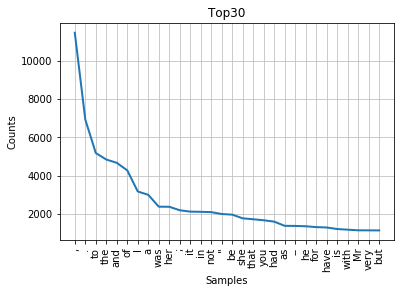

In [23]:
fdist2.plot(30, title="Top30")

In [24]:
#文章中における単語の頻出度数などの統計を計算する方法について
fdist_list = []
for i in range(len(read_book_list)):
    text = read_book_list[i]
    #単語の頻出分布 （frequency distribution）
    fdist = nltk.FreqDist(text)
    fdist_list.append(fdist)
    print("No.",i, "\n", fdist_list[i])
    print("\n", fdist_list[i].most_common(100))


No. 0 
 <FreqDist with 7811 samples and 192427 outcomes>

 [(',', 11454), ('.', 6928), ('to', 5183), ('the', 4844), ('and', 4672), ('of', 4279), ('I', 3178), ('a', 3004), ('was', 2385), ('her', 2381), (';', 2199), ('it', 2128), ('in', 2118), ('not', 2101), ('"', 2004), ('be', 1970), ('she', 1778), ('that', 1730), ('you', 1677), ('had', 1606), ('as', 1387), ('--', 1382), ('he', 1365), ('for', 1321), ('have', 1301), ('is', 1220), ('with', 1187), ('Mr', 1153), ('very', 1151), ('but', 1148), ('."', 1138), ('his', 1088), ("'", 1007), ('at', 997), ('s', 933), ('so', 924), ('Emma', 865), ('all', 835), ('could', 825), ('would', 815), ('been', 759), ('him', 758), ('Mrs', 699), ('.--', 685), ('on', 677), ('any', 651), ('my', 619), ('no', 616), ('Miss', 592), ('were', 591), ('do', 580), ('-', 574), ('must', 564), ('me', 564), ('She', 562), ('will', 559), ('by', 558), ('which', 552), ('!', 549), ('from', 535), ('Harriet', 506), ('or', 490), ('said', 484), ('much', 478), ('more', 464), ('an', 452),

No. 7 
 <FreqDist with 3016 samples and 34110 outcomes>

 [(',', 1993), ("'", 1731), ('the', 1527), ('and', 802), ('.', 764), ('to', 725), ('a', 615), ('I', 543), ('it', 527), ('she', 509), ('of', 500), ('said', 456), (",'", 397), ('Alice', 396), ('in', 357), ('was', 352), ('you', 345), ("!'", 278), ('that', 275), ('as', 246), ('her', 243), (':', 216), ('t', 216), ('at', 202), ('s', 195), ('on', 189), (".'", 187), (';', 186), ('had', 177), ('with', 175), ('all', 173), ('!', 155), ("?'", 154), ('be', 145), ('-', 141), ('for', 140), ('--', 140), ('but', 133), ('not', 129), ('they', 129), ('very', 126), ('little', 125), ('so', 124), ('out', 116), ('this', 113), ('The', 108), ('he', 101), ('down', 99), ('up', 98), ('is', 97), ('about', 94), ('one', 94), ('his', 94), ('what', 93), ('them', 88), ('know', 87), ('were', 85), ('like', 84), ('went', 83), ('again', 83), ('herself', 83), ('if', 78), ('or', 76), ('thought', 74), ('Queen', 74), ('could', 73), ('have', 73), ('then', 72), ('would', 70

No. 14 
 <FreqDist with 3560 samples and 25833 outcomes>

 [(',', 2204), ('.', 1296), ('I', 531), ('the', 502), (':', 499), ('and', 409), ("'", 384), ('to', 370), ('you', 342), ('of', 336), ('?', 296), ('not', 249), ('a', 240), ('is', 230), ('And', 218), ('d', 215), ('in', 204), ('that', 200), ('Caesar', 189), ('my', 188), ('me', 187), ('it', 166), ('him', 165), ('Brutus', 161), ('Bru', 153), ('his', 150), ('this', 141), ('your', 137), ('be', 132), ('with', 131), ('he', 129), ('will', 129), ('haue', 128), ('for', 118), ('do', 110), ('so', 109), ('shall', 107), ('Cassi', 107), (';', 106), ('thou', 100), ('as', 100), ('are', 96), ('all', 90), ('That', 89), ('Cassius', 85), ('by', 82), ('we', 82), ('then', 79), ('our', 79), ('on', 78), ('The', 76), ('-', 76), ('To', 76), ('Antony', 75), ('But', 73), ('What', 70), ('O', 69), ('but', 68), ('no', 68), ('know', 66), ('did', 66), ('was', 64), ('Enter', 63), ('men', 62), ('vs', 62), ('them', 60), ('what', 59), ('man', 58), ('For', 58), ('their'

<FreqDist with 7811 samples and 192427 outcomes>


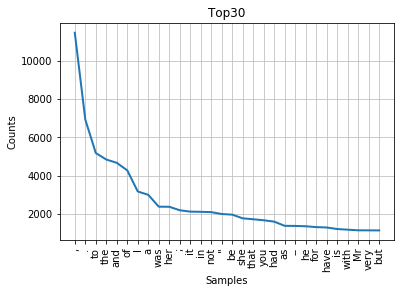

<FreqDist with 6132 samples and 98171 outcomes>


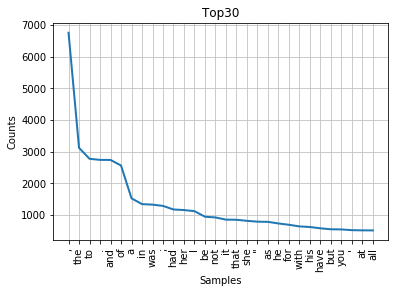

<FreqDist with 6833 samples and 141576 outcomes>


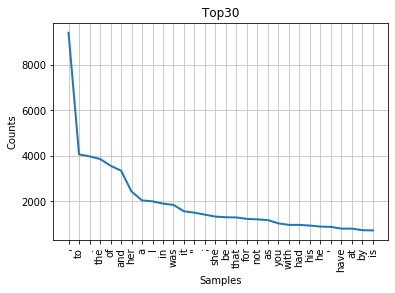

<FreqDist with 13769 samples and 1010654 outcomes>


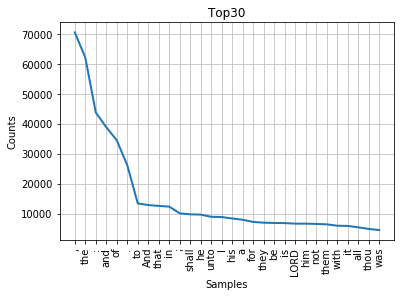

<FreqDist with 1820 samples and 8354 outcomes>


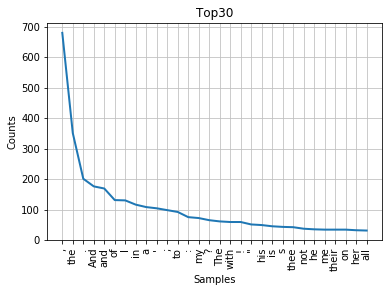

<FreqDist with 4420 samples and 55563 outcomes>


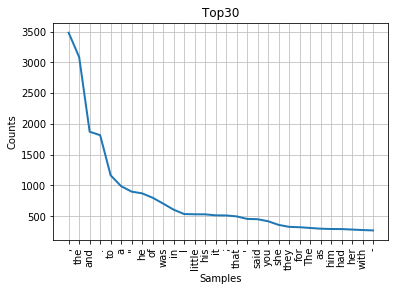

<FreqDist with 1764 samples and 18963 outcomes>


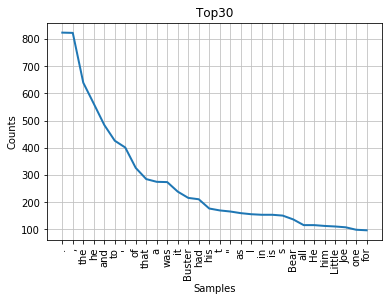

<FreqDist with 3016 samples and 34110 outcomes>


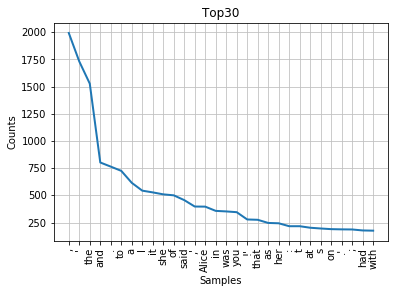

<FreqDist with 8947 samples and 96996 outcomes>


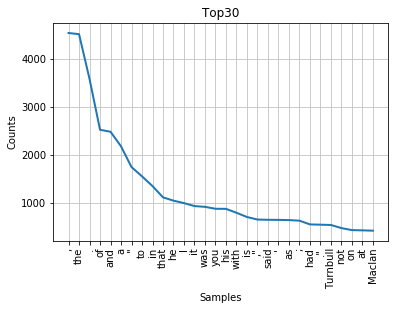

<FreqDist with 8299 samples and 86063 outcomes>


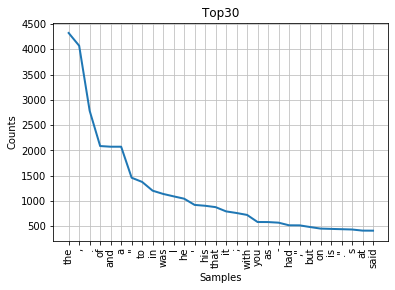

<FreqDist with 6807 samples and 69213 outcomes>


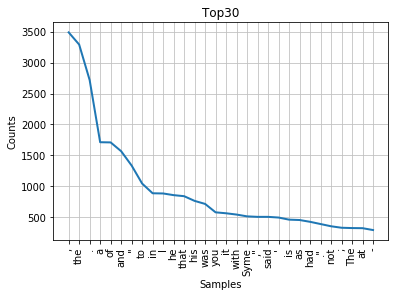

<FreqDist with 9593 samples and 210663 outcomes>


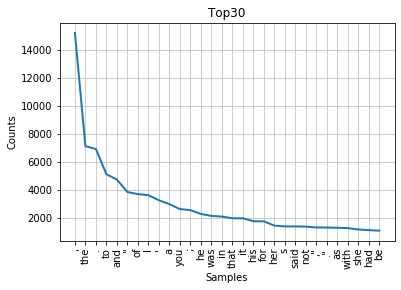

<FreqDist with 19317 samples and 260819 outcomes>


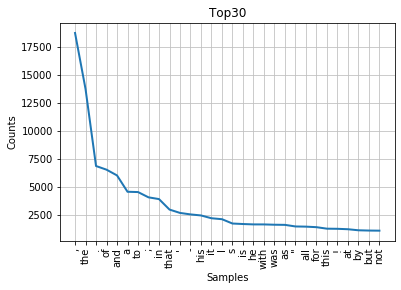

<FreqDist with 10751 samples and 96825 outcomes>


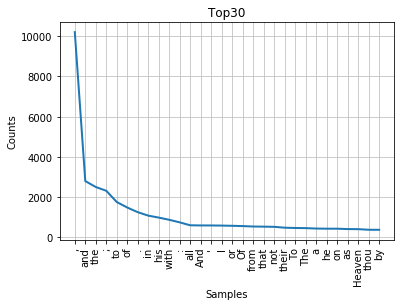

<FreqDist with 3560 samples and 25833 outcomes>


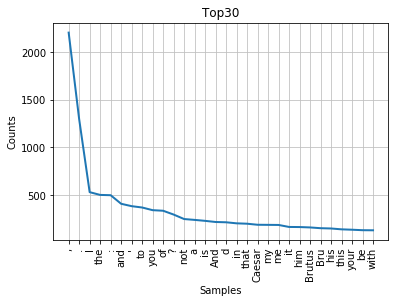

<FreqDist with 5447 samples and 37360 outcomes>


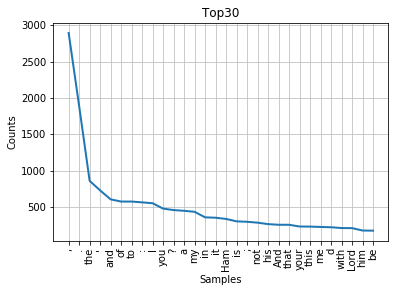

<FreqDist with 4017 samples and 23140 outcomes>


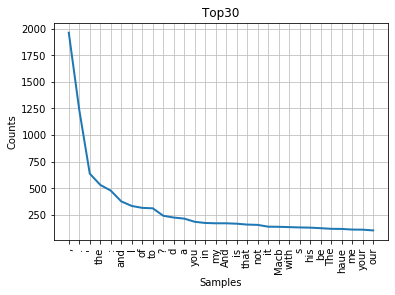

<FreqDist with 14329 samples and 154883 outcomes>


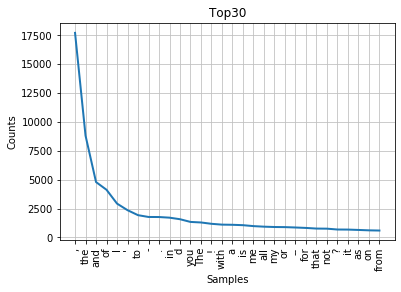

In [25]:
num_counted = 30
for i in range(len(read_book_list)):
    print(fdist_list[i])
    fdist_list[i].plot(num_counted, title="Top"+str(num_counted))

In [26]:
fdist_list[i]

FreqDist({',': 17713, 'the': 8814, 'and': 4797, 'of': 4127, 'I': 2932, "'": 2362, 'to': 1930, '-': 1774, '.': 1769, 'in': 1714, ...})

# fdistから記号を取り除いて可視化

In [27]:
fdist, fdist_list[0]

(FreqDist({',': 17713, 'the': 8814, 'and': 4797, 'of': 4127, 'I': 2932, "'": 2362, 'to': 1930, '-': 1774, '.': 1769, 'in': 1714, ...}),
 FreqDist({',': 11454, '.': 6928, 'to': 5183, 'the': 4844, 'and': 4672, 'of': 4279, 'I': 3178, 'a': 3004, 'was': 2385, 'her': 2381, ...}))

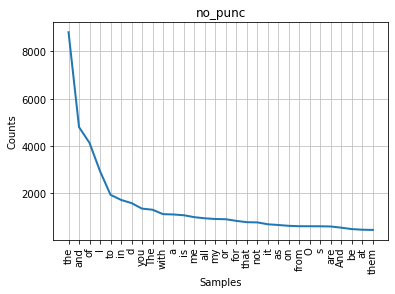

In [28]:
fdist_no_punc = nltk.FreqDist(dict((word, freq) for word, freq in fdist.items() if word.isalpha()))
fdist_no_punc.plot(30, title='no_punc')

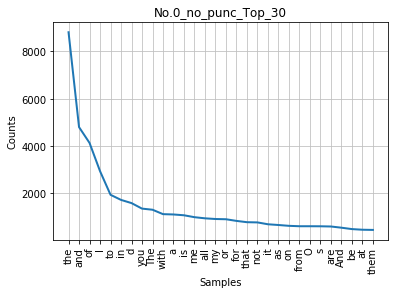

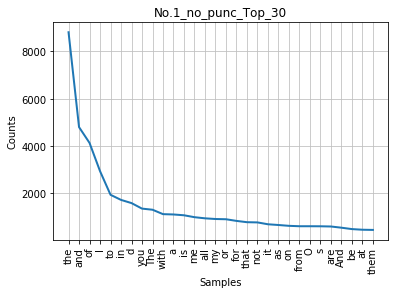

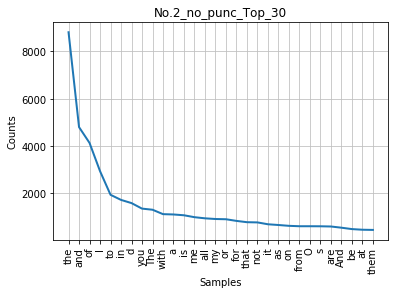

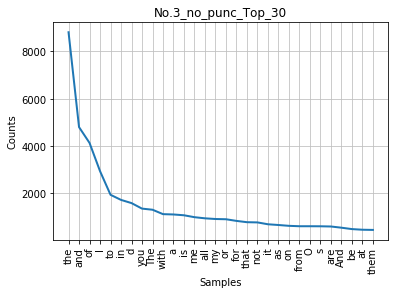

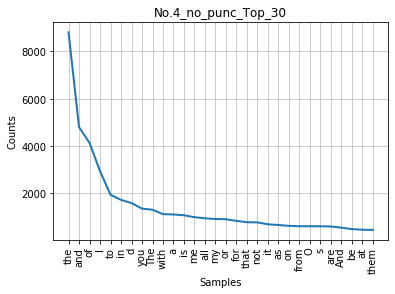

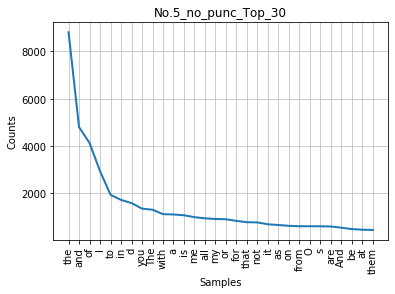

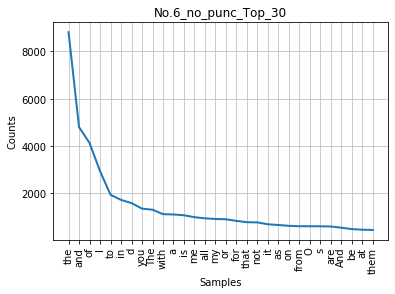

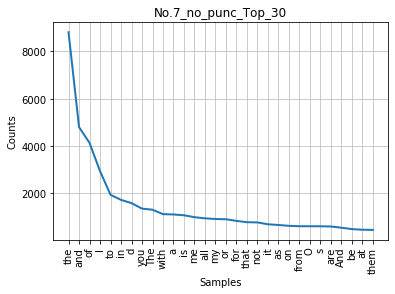

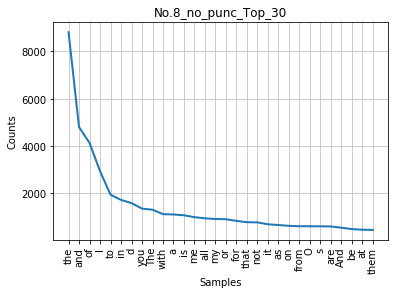

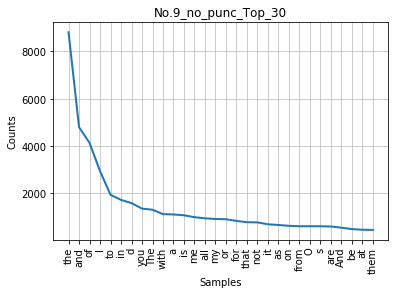

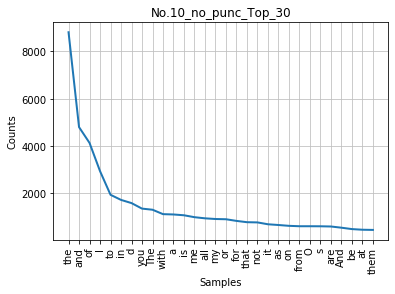

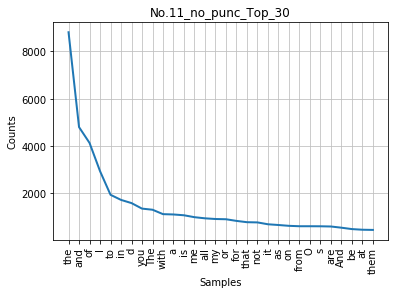

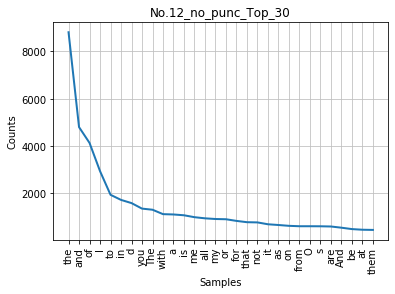

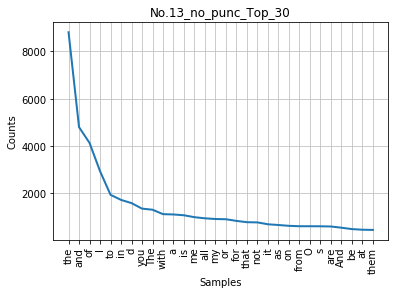

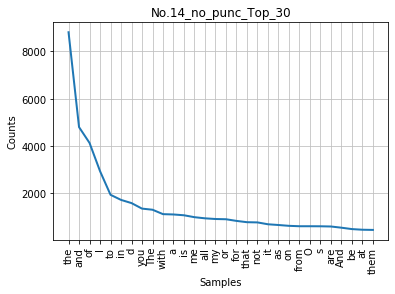

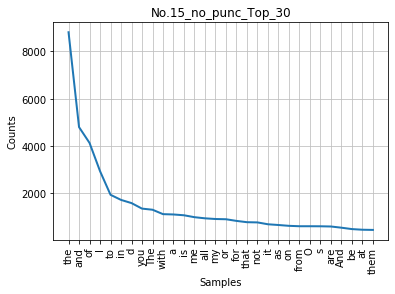

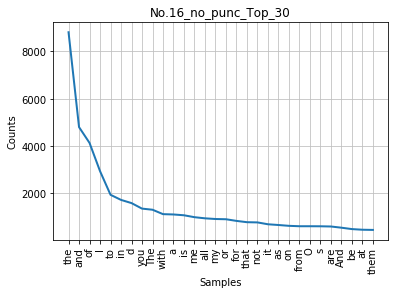

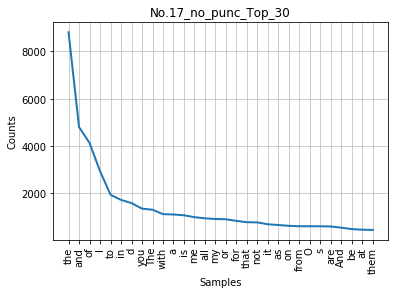

In [29]:
num_counted = 30
fdist_array = np.array(fdist_list)
#for i in range(len(fdist_array)):
for i in range(len(read_book_list)):
    fdist_no_punc = nltk.FreqDist(dict((word, freq) for word, freq in fdist.items() if word.isalpha()))
    fdist_no_punc.plot(num_counted,  title="No."+str(i)+'_no_punc'+'_Top_'+str(num_counted))
    

In [30]:
dict((word, freq) for word, freq in fdist.items() if word.isalpha())

{'Leaves': 7,
 'of': 4127,
 'Grass': 2,
 'by': 437,
 'Walt': 9,
 'Whitman': 8,
 'Come': 33,
 'said': 26,
 'my': 905,
 'soul': 241,
 'Such': 12,
 'verses': 5,
 'for': 825,
 'Body': 5,
 'let': 49,
 'us': 109,
 'write': 9,
 'we': 231,
 'are': 588,
 'one': 306,
 'That': 84,
 'should': 42,
 'I': 2932,
 'after': 98,
 'return': 57,
 'Or': 108,
 'long': 224,
 'hence': 25,
 'in': 1714,
 'other': 102,
 'spheres': 11,
 'There': 35,
 'to': 1930,
 'some': 136,
 'group': 11,
 'mates': 6,
 'the': 8814,
 'chants': 23,
 'resuming': 5,
 'Tallying': 3,
 'Earth': 20,
 's': 597,
 'soil': 26,
 'trees': 56,
 'winds': 36,
 'tumultuous': 6,
 'waves': 64,
 'Ever': 27,
 'with': 1111,
 'pleas': 10,
 'd': 1579,
 'smile': 10,
 'may': 85,
 'keep': 23,
 'on': 616,
 'and': 4797,
 'ever': 140,
 'yet': 214,
 'owning': 5,
 'as': 651,
 'first': 53,
 'here': 174,
 'now': 222,
 'Signing': 1,
 'Soul': 8,
 'set': 15,
 'them': 443,
 'name': 47,
 'BOOK': 34,
 'INSCRIPTIONS': 1,
 'One': 48,
 'Self': 5,
 'Sing': 13,
 'self': 21,


In [31]:
fdist_list[0].items()

dict_items([('[', 2), ('Emma', 865), ('by', 558), ('Jane', 301), ('Austen', 1), ('1816', 1), (']', 1), ('VOLUME', 3), ('I', 3178), ('CHAPTER', 55), ('Woodhouse', 313), (',', 11454), ('handsome', 37), ('clever', 27), ('and', 4672), ('rich', 14), ('with', 1187), ('a', 3004), ('comfortable', 34), ('home', 130), ('happy', 122), ('disposition', 24), ('seemed', 141), ('to', 5183), ('unite', 3), ('some', 248), ('of', 4279), ('the', 4844), ('best', 85), ('blessings', 6), ('existence', 8), (';', 2199), ('had', 1606), ('lived', 25), ('nearly', 14), ('twenty', 30), ('-', 574), ('one', 413), ('years', 57), ('in', 2118), ('world', 81), ('very', 1151), ('little', 354), ('distress', 19), ('or', 490), ('vex', 1), ('her', 2381), ('.', 6928), ('She', 562), ('was', 2385), ('youngest', 4), ('two', 171), ('daughters', 7), ('most', 243), ('affectionate', 9), ('indulgent', 2), ('father', 207), ('consequence', 27), ('sister', 33), ("'", 1007), ('s', 933), ('marriage', 34), ('been', 759), ('mistress', 11), ('h

In [32]:
for i in range(len(read_book_list)):
    print("No.",i,"\n", fdist_list[i].items(), "\n")
    

No. 0 
 dict_items([('[', 2), ('Emma', 865), ('by', 558), ('Jane', 301), ('Austen', 1), ('1816', 1), (']', 1), ('VOLUME', 3), ('I', 3178), ('CHAPTER', 55), ('Woodhouse', 313), (',', 11454), ('handsome', 37), ('clever', 27), ('and', 4672), ('rich', 14), ('with', 1187), ('a', 3004), ('comfortable', 34), ('home', 130), ('happy', 122), ('disposition', 24), ('seemed', 141), ('to', 5183), ('unite', 3), ('some', 248), ('of', 4279), ('the', 4844), ('best', 85), ('blessings', 6), ('existence', 8), (';', 2199), ('had', 1606), ('lived', 25), ('nearly', 14), ('twenty', 30), ('-', 574), ('one', 413), ('years', 57), ('in', 2118), ('world', 81), ('very', 1151), ('little', 354), ('distress', 19), ('or', 490), ('vex', 1), ('her', 2381), ('.', 6928), ('She', 562), ('was', 2385), ('youngest', 4), ('two', 171), ('daughters', 7), ('most', 243), ('affectionate', 9), ('indulgent', 2), ('father', 207), ('consequence', 27), ('sister', 33), ("'", 1007), ('s', 933), ('marriage', 34), ('been', 759), ('mistress', 

In [33]:
for word, freq in fdist.items():
    print(word, freq)

[ 57
Leaves 7
of 4127
Grass 2
by 437
Walt 9
Whitman 8
1855 1
] 64
Come 33
, 17713
said 26
my 905
soul 241
Such 12
verses 5
for 825
Body 5
let 49
us 109
write 9
( 463
we 231
are 588
one 306
,) 213
That 84
should 42
I 2932
after 98
return 57
Or 108
long 224
hence 25
in 1714
other 102
spheres 11
There 35
to 1930
some 136
group 11
mates 6
the 8814
chants 23
resuming 5
Tallying 3
Earth 20
' 2362
s 597
soil 26
trees 56
winds 36
tumultuous 6
waves 64
Ever 27
with 1111
pleas 10
d 1579
smile 10
may 85
keep 23
on 616
and 4797
ever 140
yet 214
owning 5
-- 863
as 651
first 53
here 174
now 222
Signing 1
Soul 8
set 15
them 443
name 47
BOOK 34
. 1769
INSCRIPTIONS 1
} 381
One 48
- 1774
Self 5
Sing 13
self 21
sing 95
a 1097
simple 13
separate 19
person 32
Yet 48
utter 12
word 64
Democratic 2
En 3
Masse 3
Of 133
physiology 5
from 599
top 16
toe 3
Not 116
physiognomy 3
alone 82
nor 168
brain 23
is 1063
worthy 9
Muse 9
say 60
Form 3
complete 16
worthier 2
far 110
The 1298
Female 3
equally 14
Male 2
Life 2

perused 3
admirable 3
moving 25
awhile 10
among 42
Think 5
can 88
deserve 1
deserves 1
Regarding 1
intently 1
dismissing 1
stand 69
female 19
male 15
heir 6
heiress 1
spirituality 4
translatress 1
openly 1
avow 2
tending 5
finale 5
satisfier 1
due 10
advancing 20
Yes 5
comes 51
6 18
Forever 3
forever 43
brown 28
water 56
ebbs 1
flows 6
spiritual 21
mortality 2
supply 1
immortality 12
State 10
circumstances 1
subjected 1
another 46
comity 1
ears 20
President 20
weapons 13
points 8
dissatisfied 9
fang 3
glittering 4
whose 22
head 73
over 171
Resolute 1
warlike 13
including 4
However 4
high 74
acknowledge 4
contemporary 1
trail 6
geography 4
salute 13
courteously 1
employments 5
heroism 5
report 2
American 12
point 8
view 6
companionship 3
show 43
finally 13
compact 21
believe 31
found 18
ideal 10
manly 18
indicating 2
therefore 5
burning 11
fires 11
were 88
threatening 4
consume 1
lift 11
those 168
smouldering 1
give 92
abandonment 2
evangel 1
comrades 28
understand 27
sorrow 11
joy 67
p

drawn 17
wagon 5
plays 10
intertinged 1
armfuls 1
pack 6
sagging 3
mow 1
help 20
stretch 19
atop 2
load 1
soft 20
jolts 1
leg 4
reclined 1
jump 3
cross 28
seize 6
clover 6
timothy 3
roll 18
heels 3
tangle 2
wisps 1
Alone 6
wilds 7
hunt 2
Wandering 8
amazed 2
lightness 1
glee 2
late 19
afternoon 10
choosing 3
safe 12
spot 6
Kindling 1
broiling 1
kill 10
Falling 4
asleep 4
dog 3
Yankee 8
clipper 5
cuts 3
scud 2
settle 6
bend 10
prow 2
shout 5
joyously 6
clam 4
diggers 2
stopt 3
tuck 1
trowser 1
ends 5
went 13
chowder 1
kettle 4
saw 77
marriage 7
trapper 2
bride 10
Her 12
friends 25
legged 2
dumbly 1
smoking 4
moccasins 2
thick 17
blankets 2
hanging 5
shoulders 13
lounged 1
mostly 4
skins 1
luxuriant 1
curls 1
protected 2
eyelashes 2
coarse 7
straight 10
locks 5
descended 6
voluptuous 3
limbs 28
runaway 3
slave 14
outside 12
crackling 2
twigs 3
woodpile 1
swung 1
door 24
kitchen 3
limpsy 2
weak 2
log 5
assured 1
brought 20
tub 3
bruis 3
gave 16
room 32
enter 15
clothes 14
remember 16
perf

29 1
Blind 1
wrestling 1
sheath 3
hooded 1
tooth 3
ache 3
leaving 16
Parting 2
track 5
arriving 10
perpetual 11
payment 2
loan 1
Rich 4
showering 1
recompense 1
richer 1
Sprouts 1
accumulate 1
curb 2
prolific 3
vital 9
Landscapes 1
sized 3
golden 15
30 1
truths 4
neither 17
delivery 1
obstetric 1
forceps 1
insignificant 2
Logic 1
sermons 1
convince 4
damp 5
deeper 5
proves 2
denies 2
soggy 1
clods 3
lamps 7
compend 1
compends 1
flower 8
branch 2
boundlessly 1
lesson 19
until 4
omnific 1
31 1
journey 15
pismire 1
sand 19
egg 2
wren 1
toad 1
chef 2
oeuvre 1
highest 4
blackberry 1
adorn 5
parlors 3
narrowest 1
hinge 1
machinery 7
cow 5
crunching 1
depress 1
surpasses 1
statue 1
mouse 1
stagger 2
sextillions 1
infidels 1
incorporate 2
gneiss 1
threaded 2
moss 7
fruits 13
grains 4
esculent 2
stucco 1
quadrupeds 1
distanced 1
reasons 12
vain 15
speeding 6
shyness 1
plutonic 1
approach 13
mastodon 1
powder 8
leagues 2
shapes 22
settling 3
hollows 3
monsters 2
lying 12
buzzard 2
houses 38
hers

eaters 1
drinkers 3
downward 4
tides 13
neighbors 5
refreshing 2
inexplicable 1
query 1
thorn 1
itches 1
thirsts 1
vexer 1
hoot 2
sly 3
sobbing 4
bandage 3
chin 3
trestles 2
dimes 1
greed 4
brains 6
liberally 2
spooning 2
Tickets 1
buying 2
selling 3
feast 5
Many 10
thrashing 2
chaff 1
receiving 5
idly 4
claiming 2
citizens 3
interests 3
markets 4
newspapers 1
mayor 1
councils 1
banks 10
tariffs 1
steamships 6
estate 2
personal 6
plentiful 2
manikins 1
skipping 3
collars 1
coats 3
positively 2
worms 4
fleas 1
duplicates 1
weakest 1
shallowest 2
flounders 2
omnivorous 1
flush 11
routine 4
abruptly 2
leap 5
nearer 9
printed 3
photographs 1
mail 1
turrets 2
engineers 6
dishes 2
furniture 3
host 1
hostess 1
saints 1
sages 1
yourself 49
Sermons 1
theology 2
reason 8
43 1
despise 1
faiths 4
Enclosing 1
Believing 1
responses 2
oracles 2
honoring 1
saluting 5
Making 5
fetich 2
stump 3
powowing 1
obis 1
Helping 1
llama 2
brahmin 2
trims 1
idols 2
phallic 3
austere 1
gymnosophist 1
Drinking 1
me

retired 1
inhale 3
yourselves 5
happiness 11
prefer 3
welcomes 1
Indeed 1
Grow 1
taller 2
Spring 3
pink 5
timid 2
remain 23
unbare 1
stifled 3
choked 6
Emblematic 1
blades 3
reverberations 4
example 2
exhilarating 1
tone 1
accord 1
inseparably 3
allow 5
balk 9
convey 5
purports 3
mainly 1
reality 10
mask 6
control 1
dissipate 2
entire 13
appearance 3
Holding 6
Hand 5
useless 5
fair 17
warning 10
attempt 2
further 6
follower 1
candidate 1
suspicious 2
uncertain 5
destructive 1
standard 1
novitiate 1
exhausting 1
theory 8
abandon 3
troubling 1
stealth 1
gawk 1
unborn 6
possibly 3
lest 2
unawares 2
quiet 9
clothing 1
throbs 4
Carry 1
touching 7
eternally 1
conning 1
con 2
peril 3
unquestionably 1
caught 8
Already 2
reading 4
acquire 2
vauntingly 1
praise 12
candidates 1
unless 3
victorious 10
hinted 2
splendid 8
shone 2
inseparable 4
necks 5
ma 2
trilling 1
collect 2
traverse 3
wading 3
fearing 1
post 1
fences 2
Wild 2
partly 2
later 5
smelling 1
earthy 1
gathers 2
spirits 7
thicker 2
Plu

Suez 4
Bab 1
el 1
mandeb 1
ruling 2
families 4
olive 1
grower 2
Nazareth 1
Damascus 1
lake 7
Tiberias 1
Thibet 2
trader 1
bargaining 1
Lassa 1
Japanese 1
liver 1
Ceylon 1
Sumatra 1
Borneo 1
continentals 1
archipelagoes 4
specify 2
Health 4
inevitable 3
divinely 1
Hottentot 1
clicking 1
hordes 2
impressive 1
countenances 7
brutes 4
glimmering 2
dwarf 1
Kamtschatkan 1
Greenlander 1
Lapp 1
Austral 1
sooty 1
protrusive 1
lip 4
groveling 1
Caffre 1
Berber 1
Soudanese 1
haggard 3
uncouth 1
untutor 1
Bedowee 1
plague 1
Madras 1
Nankin 1
Kaubul 1
Cairo 1
benighted 1
Amazonia 1
Patagonian 1
Feejeeman 1
compassion 1
determination 3
equalized 1
moved 4
blown 6
strait 1
bases 1
embedded 1
: 35
penetrates 1
perpendicular 1
signal 8
haunts 4
homes 5
VII 2
Road 2
Afoot 1
Healthy 1
choose 1
Henceforth 3
whimper 1
Done 2
indoor 2
complaints 3
querulous 1
criticisms 3
constellations 3
suffice 1
impossible 2
rid 1
reception 1
preference 1
felon 3
hasting 2
beggar 2
fop 1
eloping 1
couple 5
hearse 3
inter

Penobscot 1
Kenebec 1
Dwellers 3
Californian 1
Gila 1
gatherings 2
fun 1
Yellowstone 3
Seal 1
fishers 2
whalers 1
breaking 8
passages 2
arsenals 1
foundries 2
frameworks 1
girders 1
fleets 1
craft 7
kelsons 1
hackmatack 1
tiers 1
auger 2
adze 1
bolt 1
gouge 1
measur 6
got 2
bedstead 1
trough 1
rockers 1
eaten 1
prisoner 3
liquor 1
shamed 2
trod 4
sneaking 1
settee 1
unwholesome 2
gambling 1
winnings 2
losings 1
convicted 1
murderer 5
pinion 1
sheriff 1
deputies 1
dangling 1
exits 2
dissever 1
admits 1
confident 2
puff 1
scandalous 1
innocence 3
arises 1
considerate 2
therefor 1
exception 6
Oaths 1
quarrels 1
hiccupp 1
expressions 1
projecting 2
givers 1
bracing 1
XIII 1
Exposition 2
recks 1
laborer 3
Laborer 1
create 1
founded 5
religious 5
repel 2
rehabilitate 1
lessons 11
migrate 1
Greece 3
Ionia 2
immensely 1
overpaid 1
accounts 4
Troy 1
Achilles 3
wrath 2
AEneas 1
Odysseus 1
wanderings 4
Placard 1
" 20
Removed 1
Parnassus 1
Repeat 1
Jerusalem 2
jaffa 1
Mount 1
Moriah 1
castles 2
co

friendlily 1
raising 1
supremacy 1
fluttering 5
Commerce 1
opening 2
reborn 3
Lives 2
resumed 6
Commencing 1
morrow 2
queen 2
sends 3
eldest 1
reversing 2
lid 1
perceptibly 1
copiously 2
Bend 3
precedent 3
debouching 1
footing 2
XIX 1
SEA 1
DRIFT 1
Cradle 1
Endlessly 2
Rocking 1
shuttle 1
bareheaded 1
barefoot 3
shower 4
halo 2
twining 2
blackberries 2
fallings 1
swollen 2
notes 15
arous 6
revisiting 1
Borne 2
hurriedly 1
Throwing 1
confronting 5
uniter 2
hereafter 1
seashore 1
feather 1
crouch 5
disturbing 1
Cautiously 2
translating 2
Shine 1
Pour 4
thenceforward 1
calmer 2
brier 3
remaining 1
Blow 6
prong 1
slapping 5
Sat 2
causing 1
treasur 1
dimly 4
avoiding 2
Recalling 1
obscure 1
breakers 3
wafting 3
Following 2
Soothe 1
wave 8
soothes 2
Low 3
lagging 2
madly 3
Loud 6
Surely 4
whichever 2
Pierce 1
catch 4
Shake 1
Carols 3
waning 2
droops 2
nois 1
responding 7
altogether 5
immediately 3
Hither 1
announce 17
decoy 1
sorrowful 7
troubled 1
throbbing 2
uselessly 2
Loved 1
aria 2
cont

firing 1
eagerly 1
Elsewhere 1
brandish 1
delay 1
suffocating 1
hover 1
seconds 1
wafts 1
infantry 1
hobbling 2
Grime 1
aide 1
de 2
galloping 3
patter 1
bombs 1
vari 1
rockets 1
Saluting 1
Colors 1
turban 3
greet 2
comist 1
doughty 1
Sherman 1
sunder 1
beast 1
cruel 2
slaver 1
wags 1
darkling 1
guidons 1
blear 1
marvelous 1
Pertains 1
pertains 1
beguile 1
Awkward 1
dancer 2
coterie 2
inures 1
Beauty 1
sooth 3
Composed 1
Race 6
credulity 1
abiding 1
temper 3
Notice 1
Milky 2
ript 1
detaching 1
Coals 1
baleful 1
significant 4
Tan 1
Faced 1
Praises 1
presents 1
unstinted 1
Reconciliation 1
Word 1
1865 3
stab 2
Lay 3
Lap 1
security 2
unsettle 1
cautions 1
majorities 1
threat 2
lure 2
defeated 2
Cluster 1
Covering 2
seashores 1
lining 1
dappled 1
Civilian 1
dulcet 2
civilian 1
languishing 2
erewhile 5
martial 2
throb 3
tunes 3
Victress 2
Peaks 2
brow 3
regarding 1
conspired 1
beleaguering 1
thwarting 1
Dominant 1
Flauntest 1
unharm 3
soundness 1
mastery 1
rapturous 1
Spirit 7
Ere 1
gloomies

Editor 1
schoolboy 1
lets 2
quits 2
salaams 1
abstracted 1
nudge 1
untruth 1
plann 1
architect 1
seventy 3
conceived 1
articulate 1
spins 1
Tests 1
unapproachable 1
analysis 1
outer 2
authorities 2
corroborates 1
touches 3
Torch 1
spearing 1
salmon 1
canoe 1
ablaze 2
Star 3
71 1
Beseems 1
mastless 1
hulk 1
madden 1
helmsman 3
smitten 2
Orb 2
enthusiast 1
vanities 1
unexampled 1
woes 2
faults 1
aimedst 1
highly 1
wouldst 2
sell 1
wakedst 1
drugg 1
giantess 1
didst 1
rend 1
couldst 1
pierced 1
thrust 2
Product 2
deathly 1
poisons 2
Onward 3
Finish 1
dispel 2
travail 1
Ox 1
Tamer 1
county 2
region 4
tamer 3
olds 2
bullock 2
chafes 1
subsides 1
tames 1
hereabout 1
buff 1
brindled 1
horns 1
sagacious 1
uneasy 1
marvel 2
School 2
Inauguration 1
Public 1
Camden 1
Jersey 1
1874 1
auroral 1
Building 1
equipping 1
spelling 1
ciphering 1
classes 1
infinitely 1
Fox 1
.") 1
Cast 1
reckoning 2
girlhood 1
boyhood 2
Morn 1
Emerging 1
coil 1
treason 1
beheld 2
Fail 2
certify 1
snakes 1
loathsome 1
grub

dismalest 1
tolls 1
Features 1
trick 3
creas 1
cadaverous 1
erased 2
neath 1
disguises 1
Splay 1
tangling 1
fores 1
unmuzzled 1
smear 1
slobbering 1
rubbish 1
landlord 1
staves 2
runners 1
flavor 1
descent 1
spoken 1
ovum 1
Spots 1
cracks 1
disturb 1
Tall 1
hipp 2
pickets 2
blushingly 1
albescent 1
Rub 1
chafing 2
Whist 1
Lull 2
sassafras 1
cherry 2
froth 1
armchair 1
farmhouse 1
cream 1
distaff 1
Mystic 1
Trumpeter 1
trumpeter 8
musician 1
Hovering 1
vibrates 1
subdued 1
resounds 1
composer 1
chaotically 1
Gives 1
numb 1
imbonded 1
launchest 1
sensuous 1
Bring 1
makest 1
Ladies 1
cavaliers 1
barons 1
redress 1
wrongs 3
tournament 1
contestants 1
incased 1
champing 1
smiting 1
pang 2
knitting 1
diffusing 1
alembic 1
blissful 2
conjure 1
alarums 1
spell 1
grime 1
cannoneers 2
player 1
rapine 1
foundering 1
playest 1
movest 1
drawest 1
changest 1
takest 1
cheering 1
overthrown 1
opprest 1
revenges 1
feuds 1
hatreds 1
weighs 1
unshaken 1
Endurance 1
resolution 1
Vouchsafe 1
Rouse 1
belief

steal 1
lively 1
derring 1
gallant 1
studding 1
Pending 1
affectations 1
lisps 1
scorns 1
gorge 1
choking 1
gutter 1
Crouch 1
eleemosynary 1
Bacon 1
Cipher 1
text 1
evolv 1
infolded 1
denials 1
Accumulations 1
Hopes 1
ponderings 1
Coating 1
compassing 1
encrustations 1
Bravo 1
Add 1
grandsires 1
oversea 1
Interpolation 1
interpolation 1
instantaneous 1
issued 1
celerity 1
Breeze 1
heated 1
enterest 2
tempering 1
freshing 1
vitalizing 1
magical 1
bringer 1
Distances 1
somehow 1
Godly 1
Minister 1
Art 1
refinement 1
reciting 1
Accept 1
saidst 1
goest 1
debts 1
chieftest 1
debt 1
Grecian 1
Chinese 1
Biblic 1
idyls 1
Nazarene 1
Iliad 1
Odyssey 1
Eneas 1
Hesiod 1
Sophocles 1
Cid 1
Roncesvalles 1
Nibelungen 1
skalds 1
Chaucer 1
Border 1
Minstrelsy 1
Schiller 1
Walter 1
Scott 1
Darting 1
courteous 1
Christmas 1
Greeting 1
reveals 1
impedimentas 1
Ours 1
acceptance 1
brilliant 1
Crown 1
cheery 1
garner 1
flail 1
garrulous 1
unindented 1
wooded 1
filing 1
unwrit 1
Embalm 1
spake 2
unreconciled 

In [34]:
dict_element_list = []
for word, freq in fdist.items():
    #print(word, freq)
    if word.isalpha():
        dict_element = [word,freq]
        dict_element_list.append( dict_element)
        #print(dict_element_list)
        #dict((word,freq))
dict_element_list

[['Leaves', 7],
 ['of', 4127],
 ['Grass', 2],
 ['by', 437],
 ['Walt', 9],
 ['Whitman', 8],
 ['Come', 33],
 ['said', 26],
 ['my', 905],
 ['soul', 241],
 ['Such', 12],
 ['verses', 5],
 ['for', 825],
 ['Body', 5],
 ['let', 49],
 ['us', 109],
 ['write', 9],
 ['we', 231],
 ['are', 588],
 ['one', 306],
 ['That', 84],
 ['should', 42],
 ['I', 2932],
 ['after', 98],
 ['return', 57],
 ['Or', 108],
 ['long', 224],
 ['hence', 25],
 ['in', 1714],
 ['other', 102],
 ['spheres', 11],
 ['There', 35],
 ['to', 1930],
 ['some', 136],
 ['group', 11],
 ['mates', 6],
 ['the', 8814],
 ['chants', 23],
 ['resuming', 5],
 ['Tallying', 3],
 ['Earth', 20],
 ['s', 597],
 ['soil', 26],
 ['trees', 56],
 ['winds', 36],
 ['tumultuous', 6],
 ['waves', 64],
 ['Ever', 27],
 ['with', 1111],
 ['pleas', 10],
 ['d', 1579],
 ['smile', 10],
 ['may', 85],
 ['keep', 23],
 ['on', 616],
 ['and', 4797],
 ['ever', 140],
 ['yet', 214],
 ['owning', 5],
 ['as', 651],
 ['first', 53],
 ['here', 174],
 ['now', 222],
 ['Signing', 1],
 ['Sou

In [35]:
dict(dict_element_list)

{'Leaves': 7,
 'of': 4127,
 'Grass': 2,
 'by': 437,
 'Walt': 9,
 'Whitman': 8,
 'Come': 33,
 'said': 26,
 'my': 905,
 'soul': 241,
 'Such': 12,
 'verses': 5,
 'for': 825,
 'Body': 5,
 'let': 49,
 'us': 109,
 'write': 9,
 'we': 231,
 'are': 588,
 'one': 306,
 'That': 84,
 'should': 42,
 'I': 2932,
 'after': 98,
 'return': 57,
 'Or': 108,
 'long': 224,
 'hence': 25,
 'in': 1714,
 'other': 102,
 'spheres': 11,
 'There': 35,
 'to': 1930,
 'some': 136,
 'group': 11,
 'mates': 6,
 'the': 8814,
 'chants': 23,
 'resuming': 5,
 'Tallying': 3,
 'Earth': 20,
 's': 597,
 'soil': 26,
 'trees': 56,
 'winds': 36,
 'tumultuous': 6,
 'waves': 64,
 'Ever': 27,
 'with': 1111,
 'pleas': 10,
 'd': 1579,
 'smile': 10,
 'may': 85,
 'keep': 23,
 'on': 616,
 'and': 4797,
 'ever': 140,
 'yet': 214,
 'owning': 5,
 'as': 651,
 'first': 53,
 'here': 174,
 'now': 222,
 'Signing': 1,
 'Soul': 8,
 'set': 15,
 'them': 443,
 'name': 47,
 'BOOK': 34,
 'INSCRIPTIONS': 1,
 'One': 48,
 'Self': 5,
 'Sing': 13,
 'self': 21,


In [36]:
dict((word, freq) for word, freq in fdist.items() if word.isalpha())

{'Leaves': 7,
 'of': 4127,
 'Grass': 2,
 'by': 437,
 'Walt': 9,
 'Whitman': 8,
 'Come': 33,
 'said': 26,
 'my': 905,
 'soul': 241,
 'Such': 12,
 'verses': 5,
 'for': 825,
 'Body': 5,
 'let': 49,
 'us': 109,
 'write': 9,
 'we': 231,
 'are': 588,
 'one': 306,
 'That': 84,
 'should': 42,
 'I': 2932,
 'after': 98,
 'return': 57,
 'Or': 108,
 'long': 224,
 'hence': 25,
 'in': 1714,
 'other': 102,
 'spheres': 11,
 'There': 35,
 'to': 1930,
 'some': 136,
 'group': 11,
 'mates': 6,
 'the': 8814,
 'chants': 23,
 'resuming': 5,
 'Tallying': 3,
 'Earth': 20,
 's': 597,
 'soil': 26,
 'trees': 56,
 'winds': 36,
 'tumultuous': 6,
 'waves': 64,
 'Ever': 27,
 'with': 1111,
 'pleas': 10,
 'd': 1579,
 'smile': 10,
 'may': 85,
 'keep': 23,
 'on': 616,
 'and': 4797,
 'ever': 140,
 'yet': 214,
 'owning': 5,
 'as': 651,
 'first': 53,
 'here': 174,
 'now': 222,
 'Signing': 1,
 'Soul': 8,
 'set': 15,
 'them': 443,
 'name': 47,
 'BOOK': 34,
 'INSCRIPTIONS': 1,
 'One': 48,
 'Self': 5,
 'Sing': 13,
 'self': 21,


In [37]:
fdist_no_punc = nltk.FreqDist(dict(dict_element_list))
fdist_no_punc

FreqDist({'the': 8814, 'and': 4797, 'of': 4127, 'I': 2932, 'to': 1930, 'in': 1714, 'd': 1579, 'you': 1345, 'The': 1298, 'with': 1111, ...})

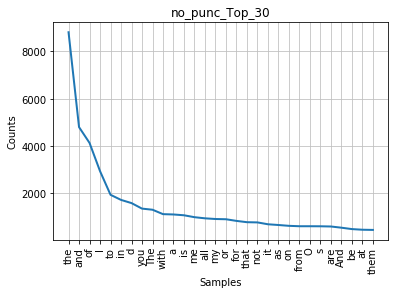

In [38]:
num_counted = 30
fdist_no_punc.plot(num_counted, title='no_punc'+'_Top_'+str(num_counted))

# fdistからstopwordを取り除いて可視化

一般的に、全文検索を行うシステムでは、「at」「of」などの前置詞や、「a」「an」「the」などの冠詞、「I」「He」「She」などの代名詞のほか、さまざまな単語をストップワードとして扱う

stopwordは、NTLKに用意されています


In [39]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
dict_no_punc_no_stopword = dict((word, freq) for word, freq in fdist.items() if word.lower() not in stopwords and word.isalpha() )
dict_no_punc_no_stopword

{'Leaves': 7,
 'Grass': 2,
 'Walt': 9,
 'Whitman': 8,
 'Come': 33,
 'said': 26,
 'soul': 241,
 'verses': 5,
 'Body': 5,
 'let': 49,
 'us': 109,
 'write': 9,
 'one': 306,
 'return': 57,
 'long': 224,
 'hence': 25,
 'spheres': 11,
 'group': 11,
 'mates': 6,
 'chants': 23,
 'resuming': 5,
 'Tallying': 3,
 'Earth': 20,
 'soil': 26,
 'trees': 56,
 'winds': 36,
 'tumultuous': 6,
 'waves': 64,
 'Ever': 27,
 'pleas': 10,
 'smile': 10,
 'may': 85,
 'keep': 23,
 'ever': 140,
 'yet': 214,
 'owning': 5,
 'first': 53,
 'Signing': 1,
 'Soul': 8,
 'set': 15,
 'name': 47,
 'BOOK': 34,
 'INSCRIPTIONS': 1,
 'One': 48,
 'Self': 5,
 'Sing': 13,
 'self': 21,
 'sing': 95,
 'simple': 13,
 'separate': 19,
 'person': 32,
 'Yet': 48,
 'utter': 12,
 'word': 64,
 'Democratic': 2,
 'En': 3,
 'Masse': 3,
 'physiology': 5,
 'top': 16,
 'toe': 3,
 'physiognomy': 3,
 'alone': 82,
 'brain': 23,
 'worthy': 9,
 'Muse': 9,
 'say': 60,
 'Form': 3,
 'complete': 16,
 'worthier': 2,
 'far': 110,
 'Female': 3,
 'equally': 14,


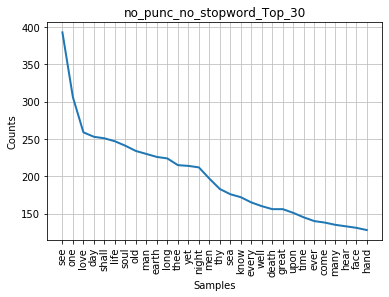

In [41]:
fdist_no_punc_no_stopwords = nltk.FreqDist( dict_no_punc_no_stopword )
num_counted = 30
fdist_no_punc_no_stopwords.plot(num_counted, title='no_punc_no_stopword'+'_Top_'+str(num_counted))

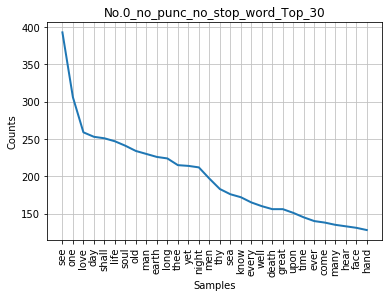

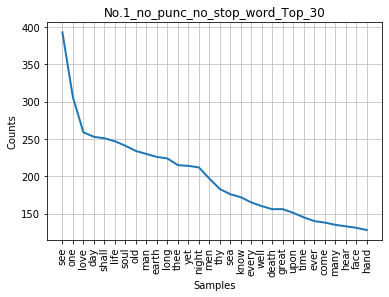

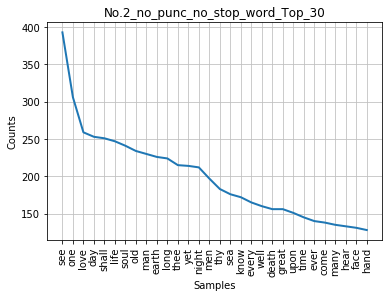

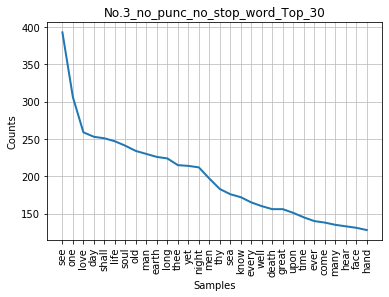

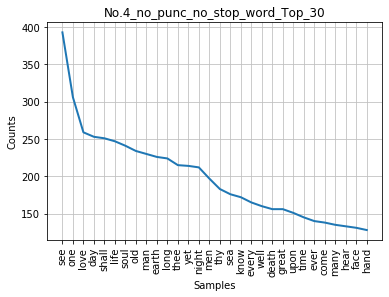

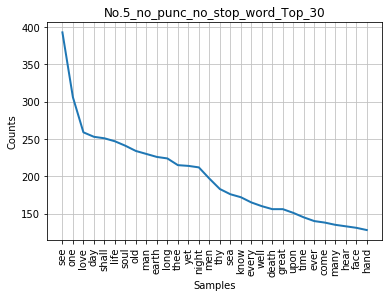

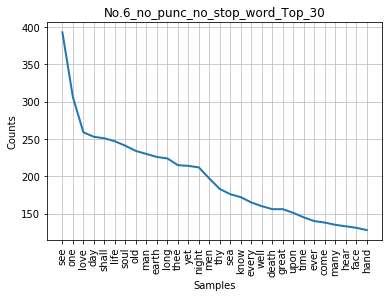

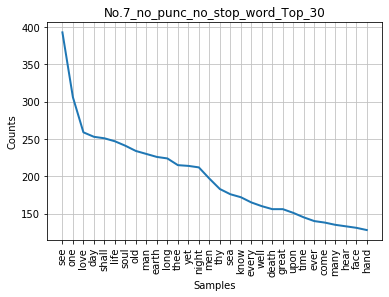

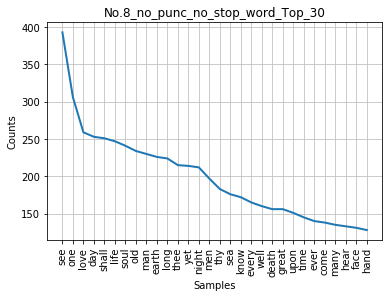

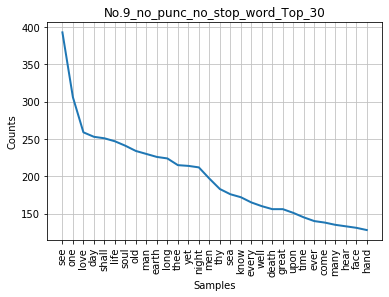

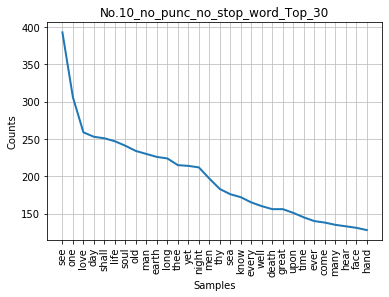

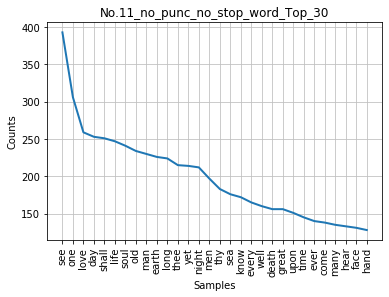

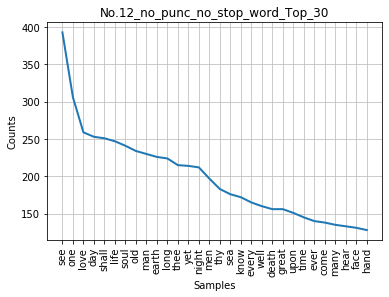

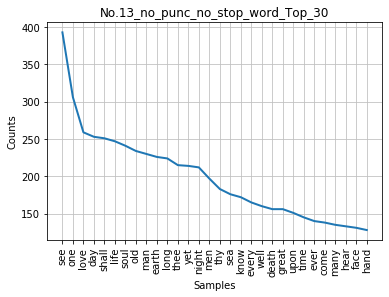

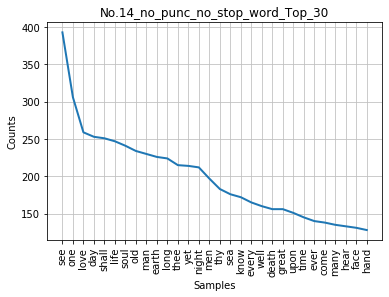

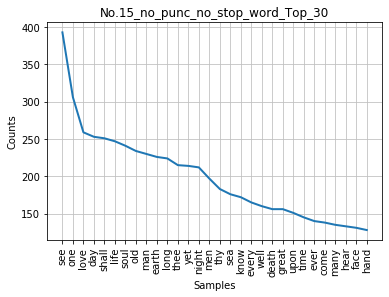

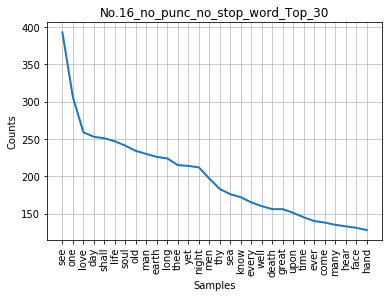

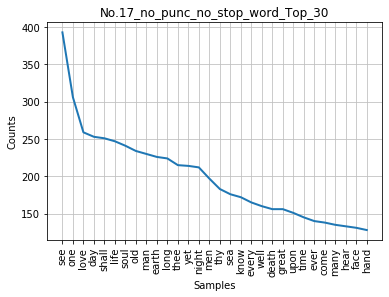

In [42]:
#fdist_array = np.array(fdist_list)
#for i in range(len(fdist_array)):
num_counted = 30
for i in range(len(read_book_list)):
    fdist_no_punc_no_stopwords = nltk.FreqDist( dict_no_punc_no_stopword )
    fdist_no_punc_no_stopwords.plot(num_counted, title="No."+str(i)+'_no_punc_no_stop_word'+'_Top_'+str(num_counted))

In [43]:
#辞書に含まれるすべてのキーを取得する
vocabulary = dict_no_punc_no_stopword.keys()
vocabulary

dict_keys(['Leaves', 'Grass', 'Walt', 'Whitman', 'Come', 'said', 'soul', 'verses', 'Body', 'let', 'us', 'write', 'one', 'return', 'long', 'hence', 'spheres', 'group', 'mates', 'chants', 'resuming', 'Tallying', 'Earth', 'soil', 'trees', 'winds', 'tumultuous', 'waves', 'Ever', 'pleas', 'smile', 'may', 'keep', 'ever', 'yet', 'owning', 'first', 'Signing', 'Soul', 'set', 'name', 'BOOK', 'INSCRIPTIONS', 'One', 'Self', 'Sing', 'self', 'sing', 'simple', 'separate', 'person', 'Yet', 'utter', 'word', 'Democratic', 'En', 'Masse', 'physiology', 'top', 'toe', 'physiognomy', 'alone', 'brain', 'worthy', 'Muse', 'say', 'Form', 'complete', 'worthier', 'far', 'Female', 'equally', 'Male', 'Life', 'immense', 'passion', 'pulse', 'power', 'Cheerful', 'freest', 'action', 'form', 'laws', 'divine', 'Modern', 'Man', 'Ponder', 'Silence', 'ponder', 'silence', 'Returning', 'upon', 'poems', 'considering', 'lingering', 'Phantom', 'arose', 'distrustful', 'aspect', 'Terrible', 'beauty', 'age', 'genius', 'poets', 'old'

# 条件付き頻度分布
(ConditionalFrequencyDistribution)を用いてbigramを扱う

In [44]:
read_book_list[0]

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [45]:
read_book_list

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...],
 ['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ...],
 ['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', ...],
 ['[', 'The', 'King', 'James', 'Bible', ']', 'The', ...],
 ['[', 'Poems', 'by', 'William', 'Blake', '1789', ']', ...],
 ['[', 'Stories', 'to', 'Tell', 'to', 'Children', 'by', ...],
 ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...],
 ['[', 'Alice', "'", 's', 'Adventures', 'in', ...],
 ['[', 'The', 'Ball', 'and', 'The', 'Cross', 'by', 'G', ...],
 ['[', 'The', 'Wisdom', 'of', 'Father', 'Brown', 'by', ...],
 ['[', 'The', 'Man', 'Who', 'Was', 'Thursday', 'by', ...],
 ['[', 'The', 'Parent', "'", 's', 'Assistant', ',', ...],
 ['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...],
 ['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...],
 ['[', 'The', 'Tragedie', 'of', 'Julius', 'Caesar', ...],
 ['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', ...],
 ['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', ...],
 ['[', 'Leave

In [46]:
#単語数（ただし，大文字・小文字を区別している）
##異なり語数（ただし，大文字・小文字を区別している）
tokens = read_book_list[0]
tokens, len(tokens), len(set(tokens))

(['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...], 192427, 7811)

In [47]:
#全ての単語を小文字化した上で，異なり語数を調べる。
tokens_l = [w.lower() for w in tokens] 
len(set(tokens_l))


7344

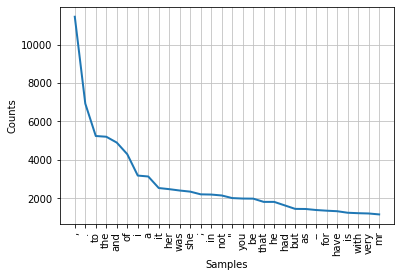

In [48]:
fd = nltk.FreqDist(tokens_l)
fd.plot(30)

In [49]:
#バイグラムを作る。
bigrams = nltk.bigrams(tokens_l)
bigrams

<generator object bigrams at 0x0000017F3953E888>

In [50]:
#バイグラムの頻度分布を得る。
fd = nltk.FreqDist(bigrams)
fd

FreqDist({(',', 'and'): 1881, ('mr', '.'): 1153, ("'", 's'): 932, (';', 'and'): 866, ('."', '"'): 757, ('mrs', '.'): 699, ('to', 'be'): 607, ('.', 'i'): 570, (',', 'i'): 568, ('of', 'the'): 559, ...})

In [51]:
cfd = nltk.ConditionalFreqDist(bigrams)
list(cfd['i'])

[]

# 単語が、テキストのどのぐらいの位置に出現するかを可視化

In [52]:
book_list[i], nltk.corpus.gutenberg.words(book_list[i]), read_book_list[i]

('whitman-leaves.txt',
 ['[', 'Leaves', 'of', 'Grass', 'by', 'Walt', 'Whitman', ...],
 ['[', 'Leaves', 'of', 'Grass', 'by', 'Walt', 'Whitman', ...])

In [53]:
nltk.Text(nltk.corpus.gutenberg.words(book_list[i])), nltk.Text(read_book_list[i]), 

(<Text: Leaves of Grass by Walt Whitman 1855>,
 <Text: Leaves of Grass by Walt Whitman 1855>)

In [54]:
prep_list

['and', 'the', 'that', 'of', 'was', 'upon', 'not', 'when', 'then']

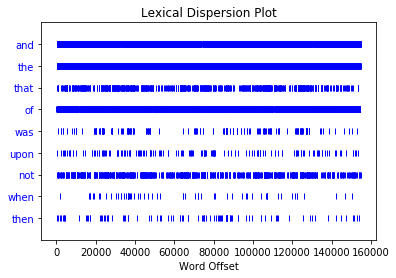

In [55]:
#単語が、テキストのどのぐらいの位置に出現するかを可視化
(nltk.Text(read_book_list[i])).dispersion_plot(prep_list)

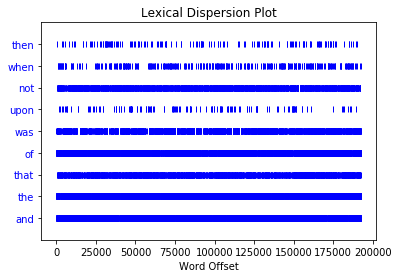

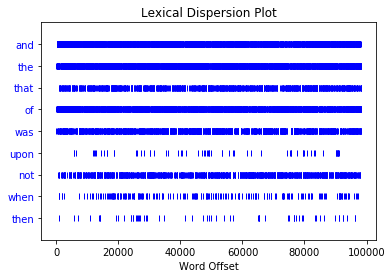

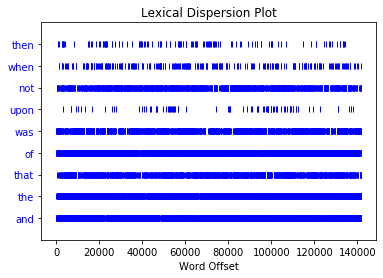

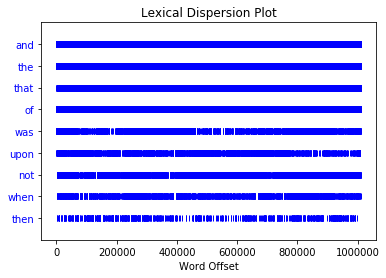

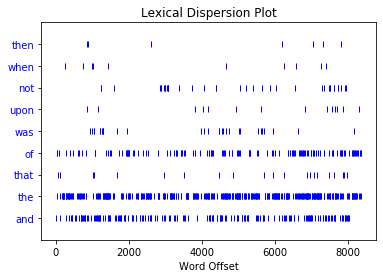

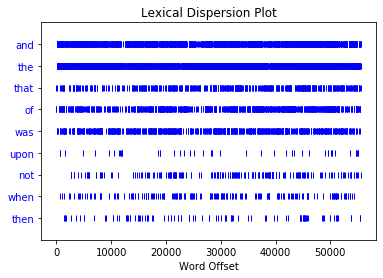

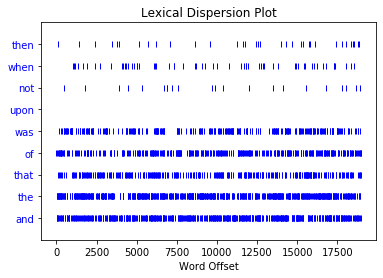

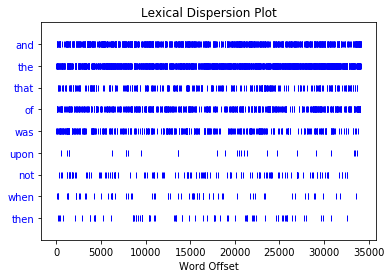

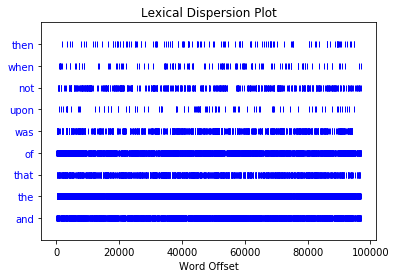

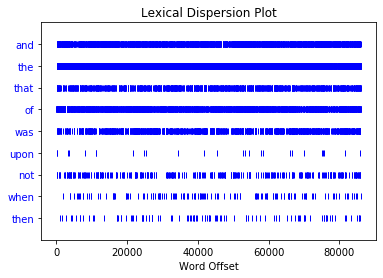

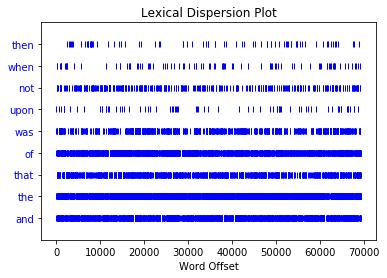

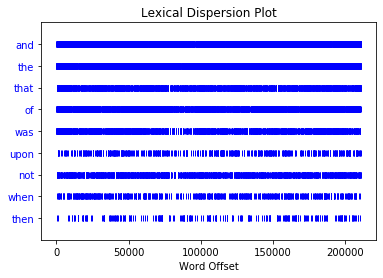

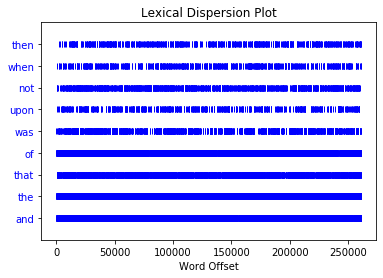

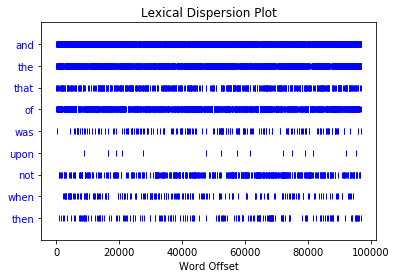

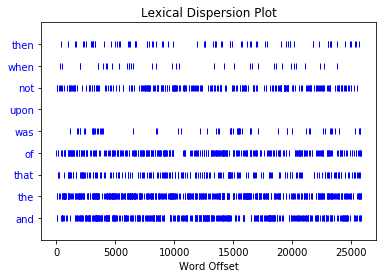

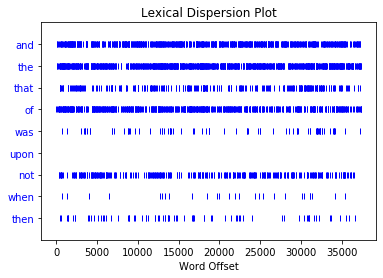

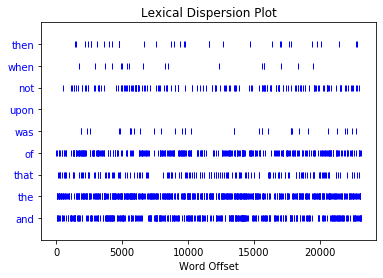

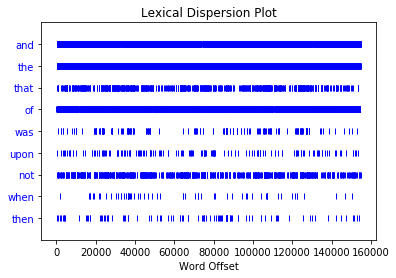

In [56]:
for i in range(len(read_book_list)):
    nltk.Text(read_book_list[i]).dispersion_plot(prep_list)